# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

<IPython.core.display.Javascript object>

## Data Overview

## Reading and Understanding Data

In [2]:
# loading the dataset
data = pd.read_csv("INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [3]:
# check the sample of data
data.sample(n=10, random_state=1)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369         Room_Type 4         55          2018              9   
2055         Room_Type 1         53          2017             12   
10969        Room_Type 1        245          2018              7   
24881        Room_Type 2        231          2018              8   
28658        Room_Type 1         71          2018              5   
20853        Room_Type 1         66          2017             10   
8501         Room_Type 2         40          2018              1   
1942         Room_Type 1         63          2018              8   

       arrival_date market_segment_type  repeated_guest  \
30392            11              Online               0   
6685             22              Online               0   
8369             11              Online               0   
2055             29              Online               0   
10969             6             Offline               0   
24881             1              Online               0   
28658            10             Offline               0   
20853             9             Offline               0   
8501             14              Online               0   
1942              9              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
30392                             0                                     0   
6685                              0                                     0   
8369                              0                                     0   
2055                              0                                     0   
10969                             0                                     0   
24881                             0                                     0   
28658                             0                                     0   
20853                             0                                     0   
8501                              0                                     0   
1942                              0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
30392               94.32                       0   Not_Canceled  
6685             

<IPython.core.display.Javascript object>

#### Observations:
* Each row in the data has details about a particular booking ID.
* There are 19 variables giving information about each booking ID.

In [4]:
# check number of rows and columns
data.shape

(36275, 19)

<IPython.core.display.Javascript object>

#### Observations:
* There are 36275 rows and 19 columns in the data.

In [5]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

#### Observations:
* There are 5 object type, 1 float type and other integer type variables in the data.
* There are no missing values in any columns.

In [6]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [7]:
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no duplicates in the data.

In [8]:
# Let's look at the statistical summary of the data

df.describe(include="all").T

count unique           top   freq  \
Booking_ID                              36275  36275      INN10338      1   
no_of_adults                          36275.0    NaN           NaN    NaN   
no_of_children                        36275.0    NaN           NaN    NaN   
no_of_weekend_nights                  36275.0    NaN           NaN    NaN   
no_of_week_nights                     36275.0    NaN           NaN    NaN   
type_of_meal_plan                       36275      4   Meal Plan 1  27835   
required_car_parking_space            36275.0    NaN           NaN    NaN   
room_type_reserved                      36275      7   Room_Type 1  28130   
lead_time                             36275.0    NaN           NaN    NaN   
arrival_year                          36275.0    NaN           NaN    NaN   
arrival_month                         36275.0    NaN           NaN    NaN   
arrival_date                          36275.0    NaN           NaN    NaN   
market_segment_type                     36275      5        Online  23214   
repeated_guest                        36275.0    NaN           NaN    NaN   
no_of_previous_cancellations          36275.0    NaN           NaN    NaN   
no_of_previous_bookings_not_canceled  36275.0    NaN           NaN    NaN   
avg_price_per_room                    36275.0    NaN           NaN    NaN   
no_of_special_requests                36275.0    NaN           NaN    NaN   
booking_status                          36275      2  Not_Canceled  24390   

                                             mean        std     min     25%  \
Booking_ID                                    NaN        NaN     NaN     NaN   
no_of_adults                             1.844962   0.518715     0.0     2.0   
no_of_children                           0.105279   0.402648     0.0     0.0   
no_of_weekend_nights                     0.810724   0.870644     0.0     0.0   
no_of_week_nights                          2.2043   1.410905     0.0     1.0   
type_of_meal_plan                             NaN        NaN     NaN     NaN   
required_car_parking_space               0.030986   0.173281     0.0     0.0   
room_type_reserved                            NaN        NaN     NaN     NaN   
lead_time                               85.232557  85.930817     0.0    17.0   
arrival_year                          2017.820427   0.383836  2017.0  2018.0   
arrival_month                            7.423653   3.069894     1.0     5.0   
arrival_date                            15.596995   8.740447     1.0     8.0   
market_segment_type                           NaN        NaN     NaN     NaN   
repeated_guest                           0.025637   0.158053     0.0     0.0   
no_of_previous_cancellations             0.023349   0.368331     0.0     0.0   
no_of_previous_bookings_not_canceled     0.153411   1.754171     0.0     0.0   
avg_price_per_room                     103.423539  35.089424     0.0    80.3   
no_of_special_requests                   0.619655   0.786236     0.0     0.0   
booking_status                                NaN        NaN     NaN     NaN   

                                         50%     75%     max  
Booking_ID                               NaN     NaN     NaN  
no_of_adults                             2.0     2.0     4.0  
no_of_children                           0.0     0.0    10.0  
no_of_weekend_nights                     1.0     2.0     7.0  
no_of_week_nights                        2.0     3.0    17.0  
type_of_meal_plan                        NaN     NaN     NaN  
required_car_parking_space               0.0     0.0     1.0  
room_type_reserved                       NaN     NaN     NaN  
lead_time                               57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  
arrival_month                            8.0    10.0    12.0  
arrival_date                            16.0    23.0    31.0  
market_segment_type                      NaN     NaN     NaN  
repeated_guest  

<IPython.core.display.Javascript object>

#### Observations:
* The maximum number of adults per booking is 4 and the maximum number of children per booking is 10.
* The maximum number of weekend nights per booking is 7 and the maximum number of week nights per booking is 17.
* There are 4 unique meal plans and most users choose meal plan 1.
* There are 7 unique room types and most users choose room type 1.
* The average lead time is 85 days with a maximum lead time of 443.
* The data contains booking information from 2017 to 2018.
* There are 5 unique market segment types and most users prefer Online reservations.

In [9]:
cat_columns = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

#### Observations:
* Most of the guests choose Meal Plan1 and Room Type 1.
* Most of the bookings are done through Online segment.

## Exploratory Data Analysis (EDA)

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, bins=bins, kde=kde, palette="winter",
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel("Count", fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### 1. What are the busiest months in the hotel?

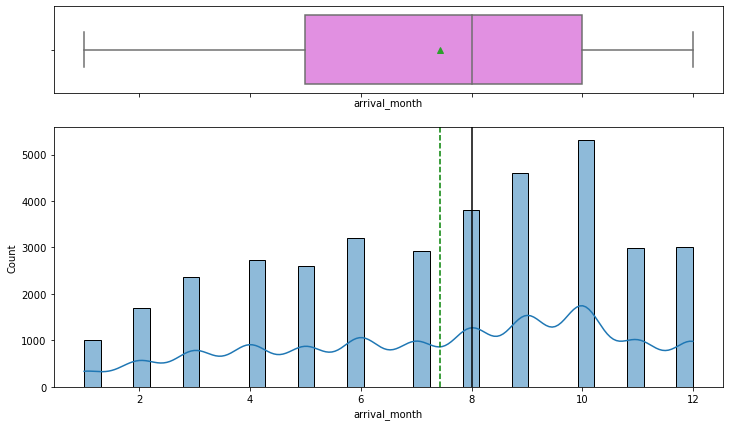

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(df, "arrival_month")

#### Observations:
* The busiest months of the year is October, September and August.

#### 2. Which market segment do most of the guests come from?

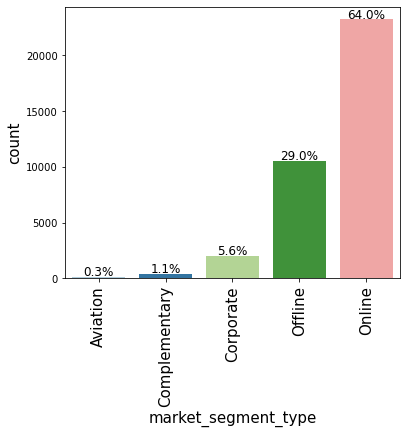

<IPython.core.display.Javascript object>

In [13]:
labeled_barplot(df, "market_segment_type")

#### Observations:
* 64% of the guests book the hotels using Online segment.
* Aviation segment is used by the least guests.

#### 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

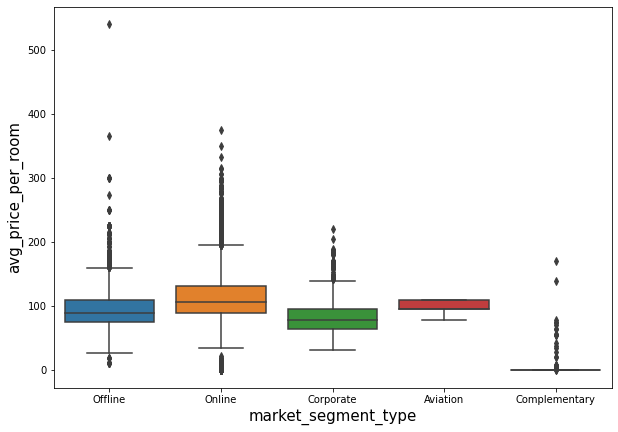

market_segment_type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.632679
Online           112.256855
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="market_segment_type", y="avg_price_per_room")
plt.xlabel("market_segment_type", fontsize=15)
plt.ylabel("avg_price_per_room", fontsize=15)
plt.show()
df.groupby("market_segment_type")["avg_price_per_room"].mean()

#### Observations:
* The Online segment has the highest average price per room followed by Aviation segment.
* Offline and Online segment have lower and upper outlier values for average price per room. Hence, these segments offer cheap and expensive rates for rooms along with average rates.

#### 4. What percentage of bookings are canceled?

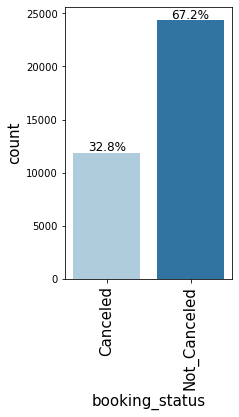

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(df, "booking_status")

#### Observations:
* 32.8% of the bookings are cancelled.

#### 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [16]:
# Creating a dataframe with booking status="Canceled"
df_cancel = df[df.booking_status == "Canceled"].copy()

<IPython.core.display.Javascript object>

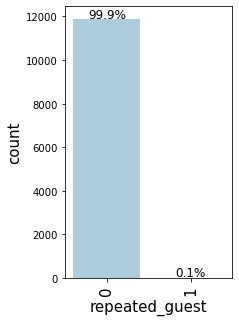

<IPython.core.display.Javascript object>

In [17]:
# Plotting a barplot of repeated_guest data for canceled bookings
labeled_barplot(df_cancel, "repeated_guest")

#### Observations:
* 0.1% of the repeated guests cancel the bookings.

#### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xlabel(predictor, fontsize=13)
    plt.show()

<IPython.core.display.Javascript object>

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


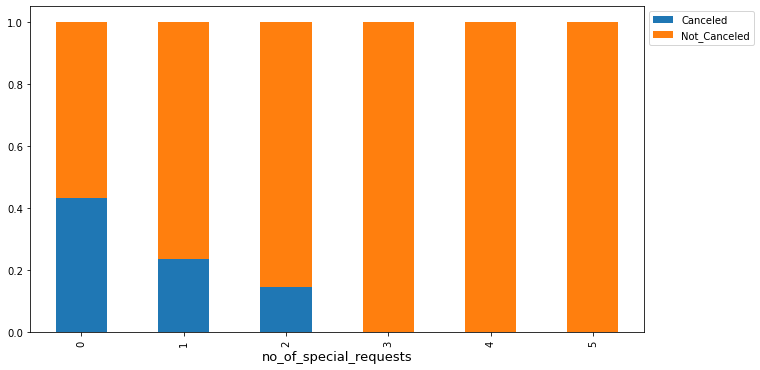

<IPython.core.display.Javascript object>

In [19]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

#### Observations:
* The number of cancellations are more when there are no special requests made.
* There are 2703 cancellations when the guests made 1 special request. This contrbutes to 23% of total booking cancellations.

### Univariate Analysis

### Observations on no_of_adults

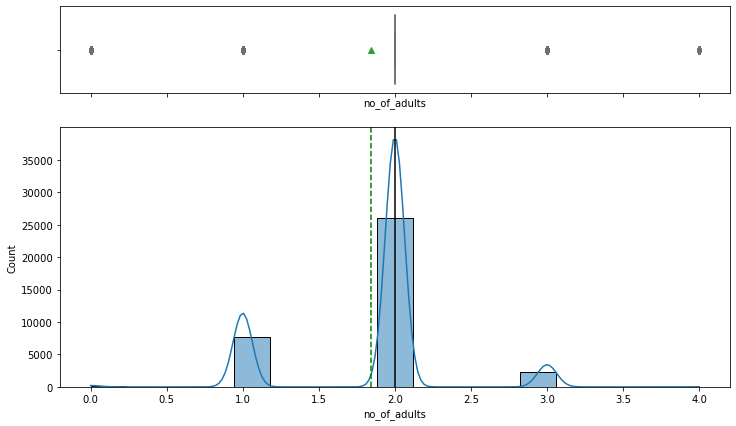

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(df, "no_of_adults")

* The number of adult guests range from 0-4.
* Most of the bookings have 2 adults.

### Observations on no_of_children

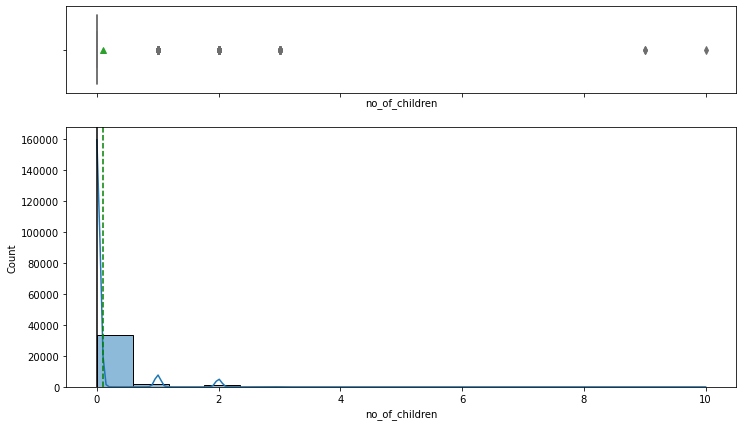

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "no_of_children")

* The number of children range from 0-10.
* More bookings are made with 0 children.

### Observations on no_of_weekend_nights

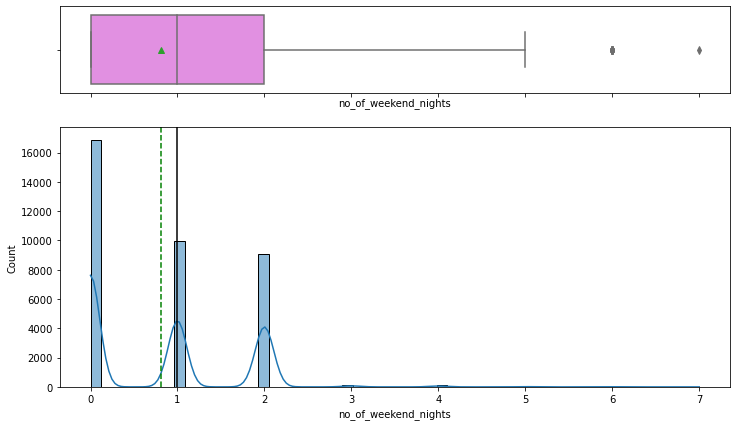

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "no_of_weekend_nights")

* The number of weekend nights in the booking data range from 0-7.
* Most of the bookings are made with 0 weekend nights.

### Observations on no_of_week_nights

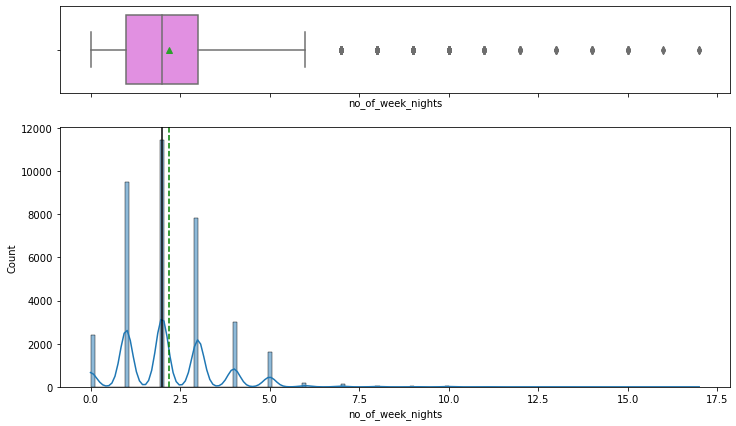

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "no_of_week_nights")

* The number of week nights range from 0 to 17.
* Most of the bookings are made for 2 week nights.
* There are few outliers in the data.

### Observations on required_car_parking_space

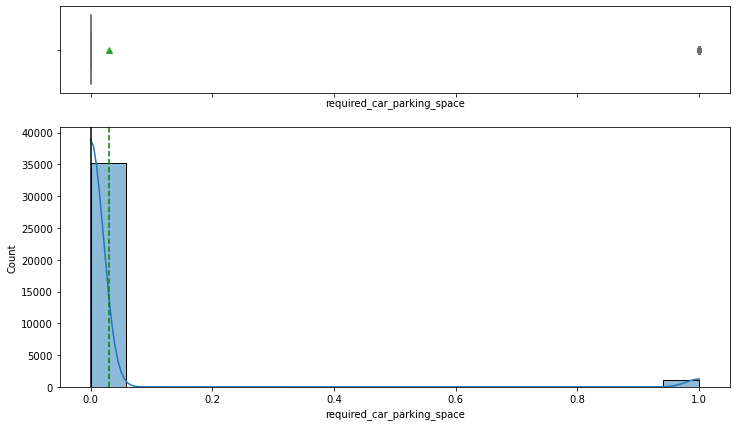

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "required_car_parking_space")

* The distribution shows that very few guests required car parking space.
* The distribution of required_car_parking_space suggests we should look at it as a category to extract more information.

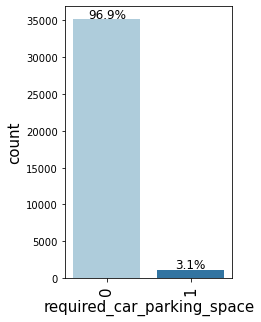

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "required_car_parking_space")

* 3.1% of the guests requested for car parking space.

### Observations on lead_time

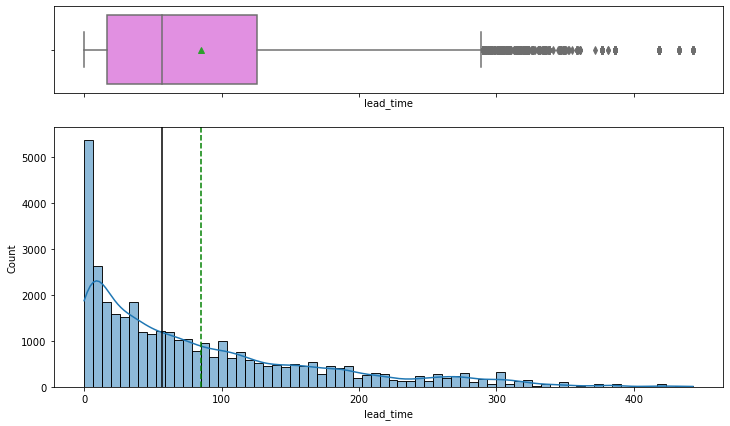

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "lead_time")

* The distribution of lead_time is left skewed.
* There are many outliers in the data of lead time.
* Average lead_time of bookings is 85 days. 
* 50% of the guests book the hotels with a lead time of 57 days.

### Observations on arrival_year

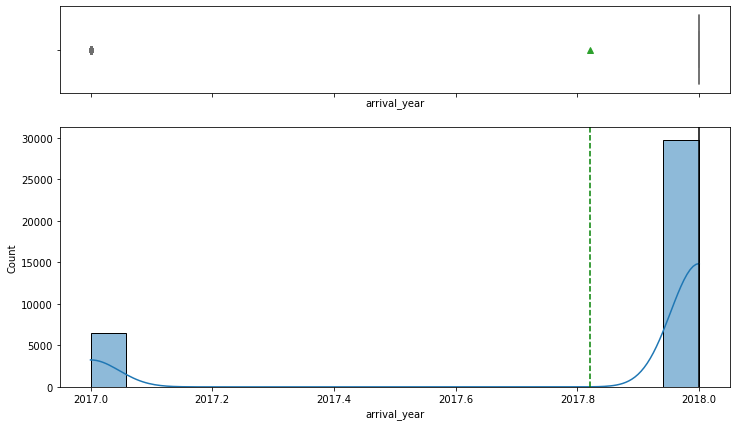

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "arrival_year")

* The data contains information about bookings made in the year of 2018 and 2017.

### Observations on arrival_month

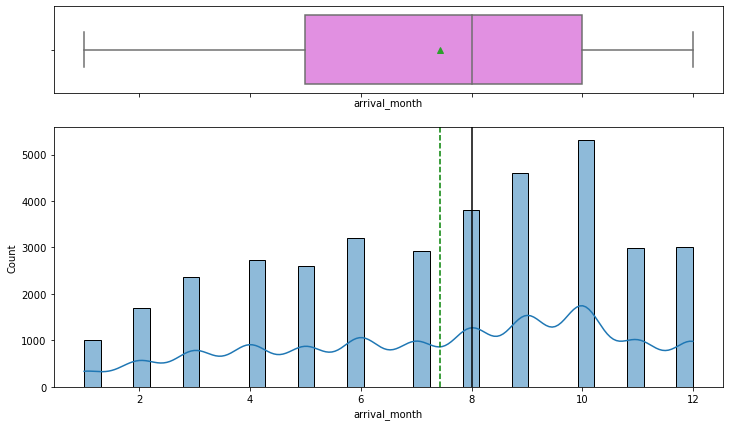

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "arrival_month")

* Most of the bookings are made in October followed by September.
* The distribution of arrival_month also suggests we should look at it as a category to extract more information.

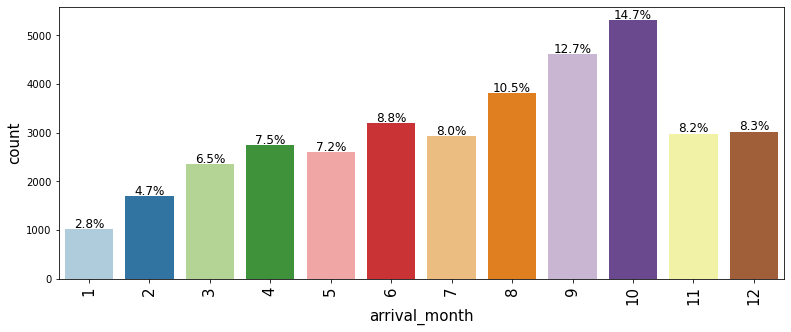

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "arrival_month")

* 14.7% of the bookings are made during October and 12.7% of the bookings are made in September.

### Observations on arrival_date

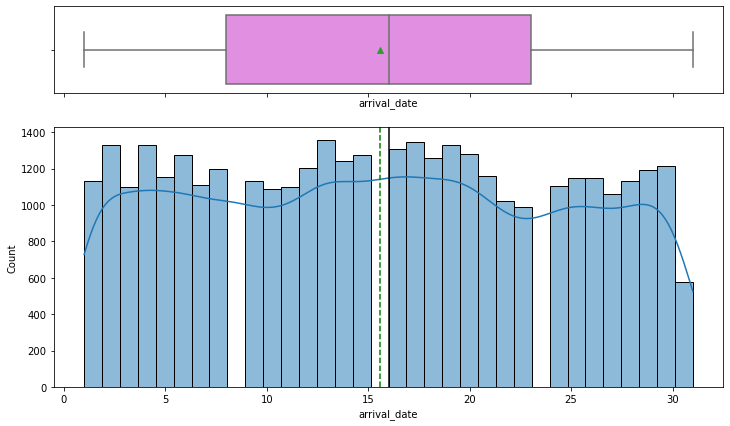

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "arrival_date")

* The data of arrival date has a uniform distribution.

### Observations on repeated_guest

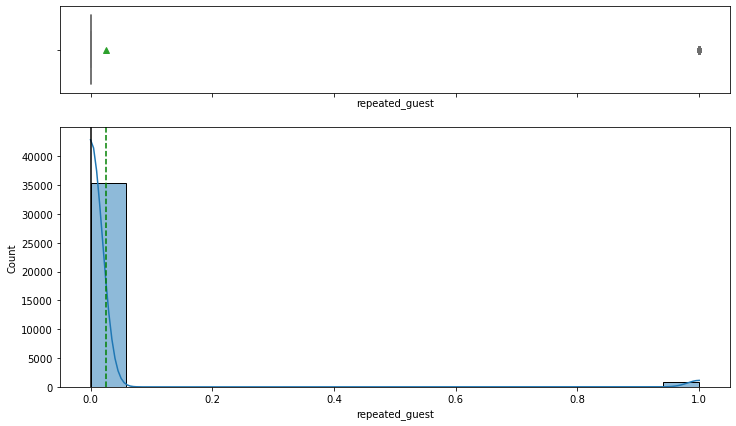

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "repeated_guest")

* The distribution shows that most of the bookings are not made by repeated guests.
* The distribution of required_car_parking_space suggests we should look at it as a category to extract more information.

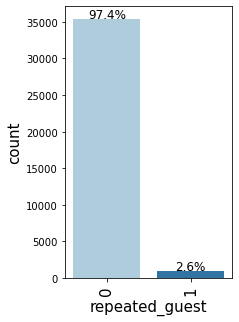

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "repeated_guest")

* Only 2.6% of the bookings are made  by repeated guests.

### Observations on no_of_previous_cancellations

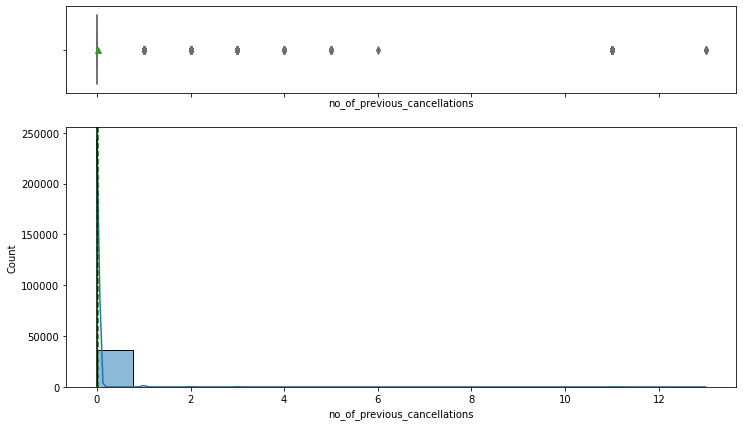

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "no_of_previous_cancellations")

* The data have few outliers.
* The distribution of no_of_previous_cancellations also suggests we should look at it as a category to extract more information.

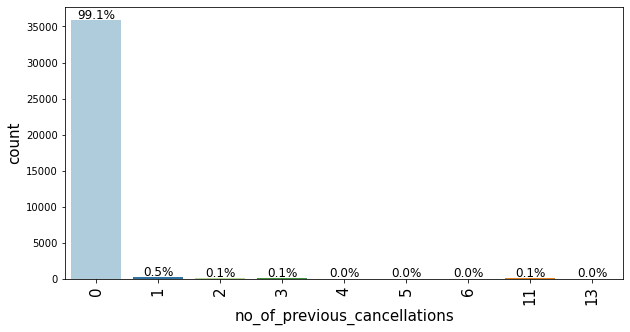

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "no_of_previous_cancellations")

* The distribution shows that 99.1% of the bookings were made by guests who didn't make any previous cancellations.

### Observations on no_of_previous_bookings_not_canceled

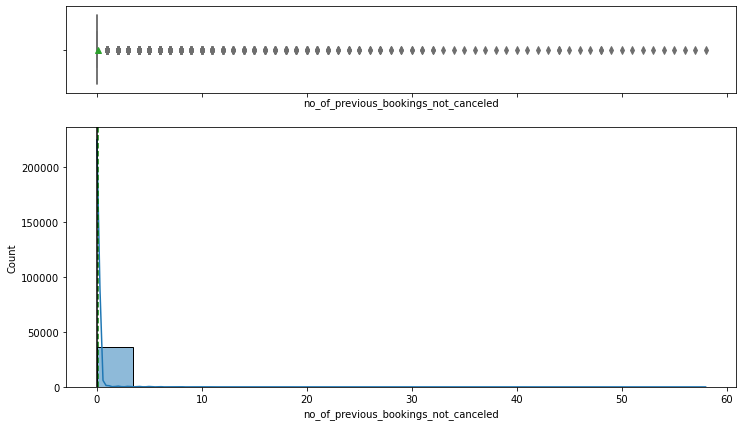

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

* The data have many outliers.
* The distribution of no_of_previous_bookings_not_canceled is left skewed.

### Observations on avg_price_per_room

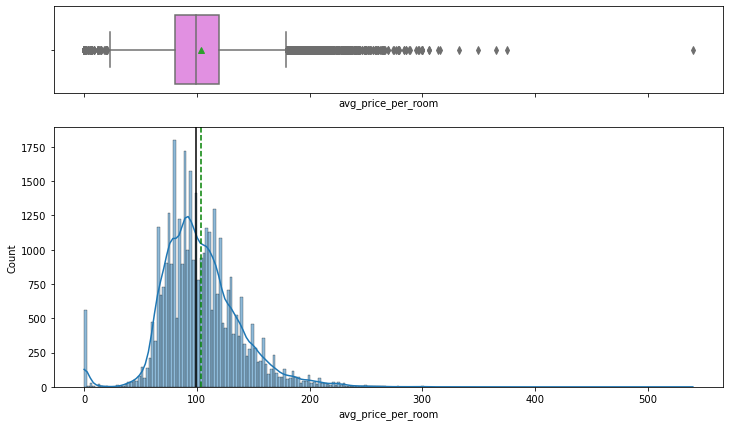

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(df, "avg_price_per_room")

* The distribution of avg_price_per_room is left skewed.
* There are lower and upper outliers in the data of avg_price_per_room.

### Observations on no_of_special_requests

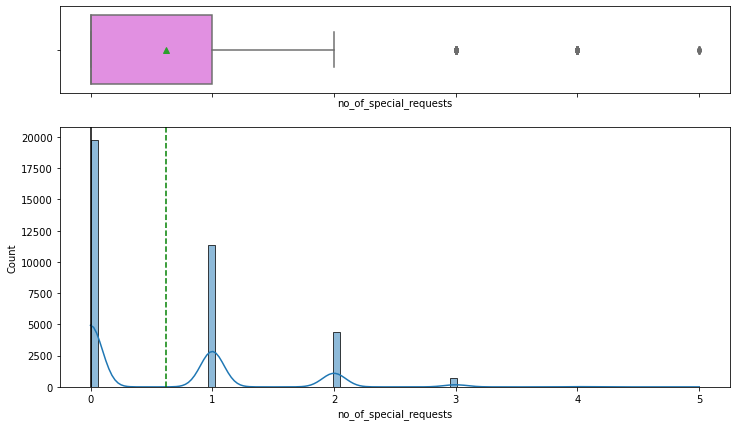

<IPython.core.display.Javascript object>

In [37]:
histogram_boxplot(df, "no_of_special_requests")

* Most of the guests don't make special requests. 
* One special request is made by approximately 11000 guests.

### Observations on type_of_meal_plan

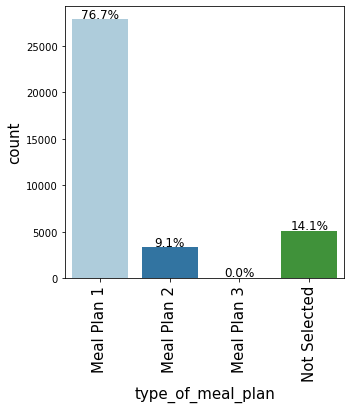

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "type_of_meal_plan")

* 76.7% of guests choose Meal Plan 1.
* 9.1% of guests choose Meal Plan 2.
* 14.1% of guests didn't choose the type of meal plan.

### Observations on room_type_reserved

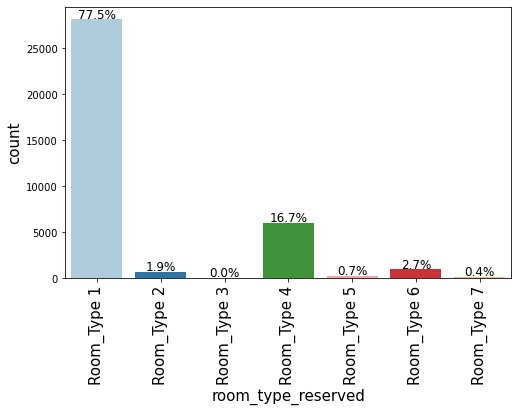

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "room_type_reserved")

* 77.5% of the guests choose Room_Type 1.
* 16.7% of the guests choose Room_type 4.
* Less than 1% of guests choose Room_Type 3, 5, 7.

### Observations on market_segment_type

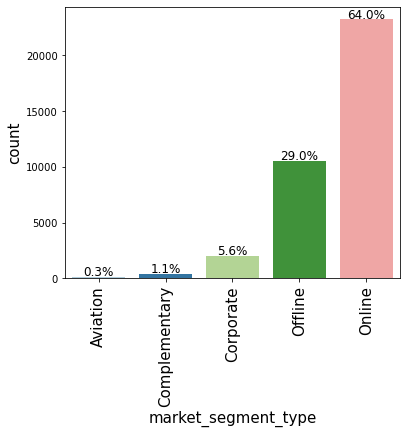

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "market_segment_type")

* 64.0% of guests make the booking through Online segment.
* Only 0.3% of guests made the booking though Aviation segment.

### Observations on booking_status

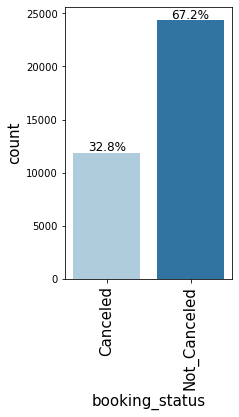

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "booking_status")

* 67.2% of the booking is not canceled by the guests.

## Checking Multicollinearity
In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

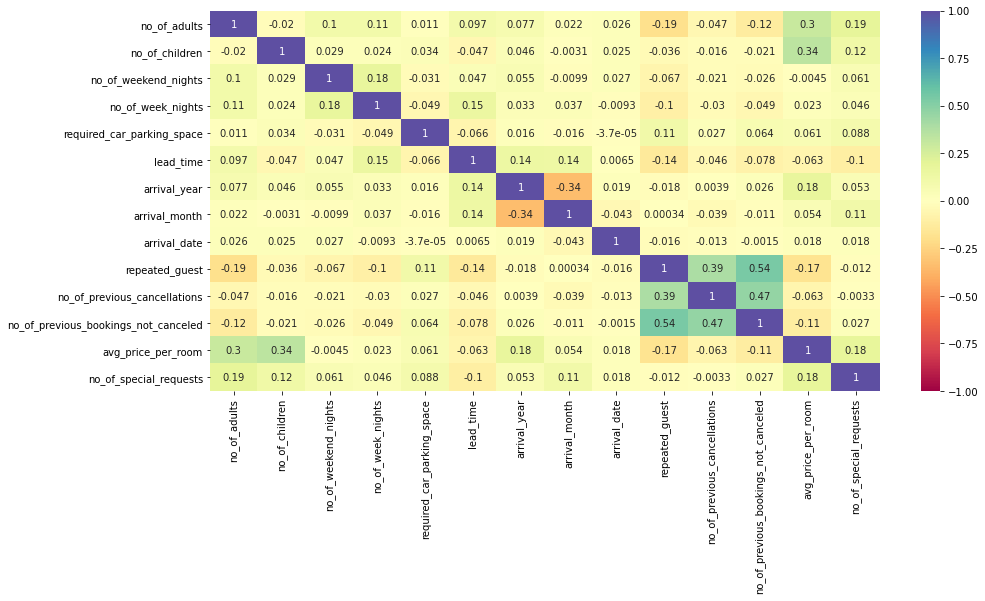

<IPython.core.display.Javascript object>

In [42]:
# Plotting heat map to see the correlation between independent variables and dependent variable
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

#### Observations:
* There is a positive correlation between the repeated_guest, no_of_previous_bookings_not_canceled and  no_of_previous_cancellations. This makes sense as only repeated guest can make previous cancellations.
* There is no significant correlation between other columns.

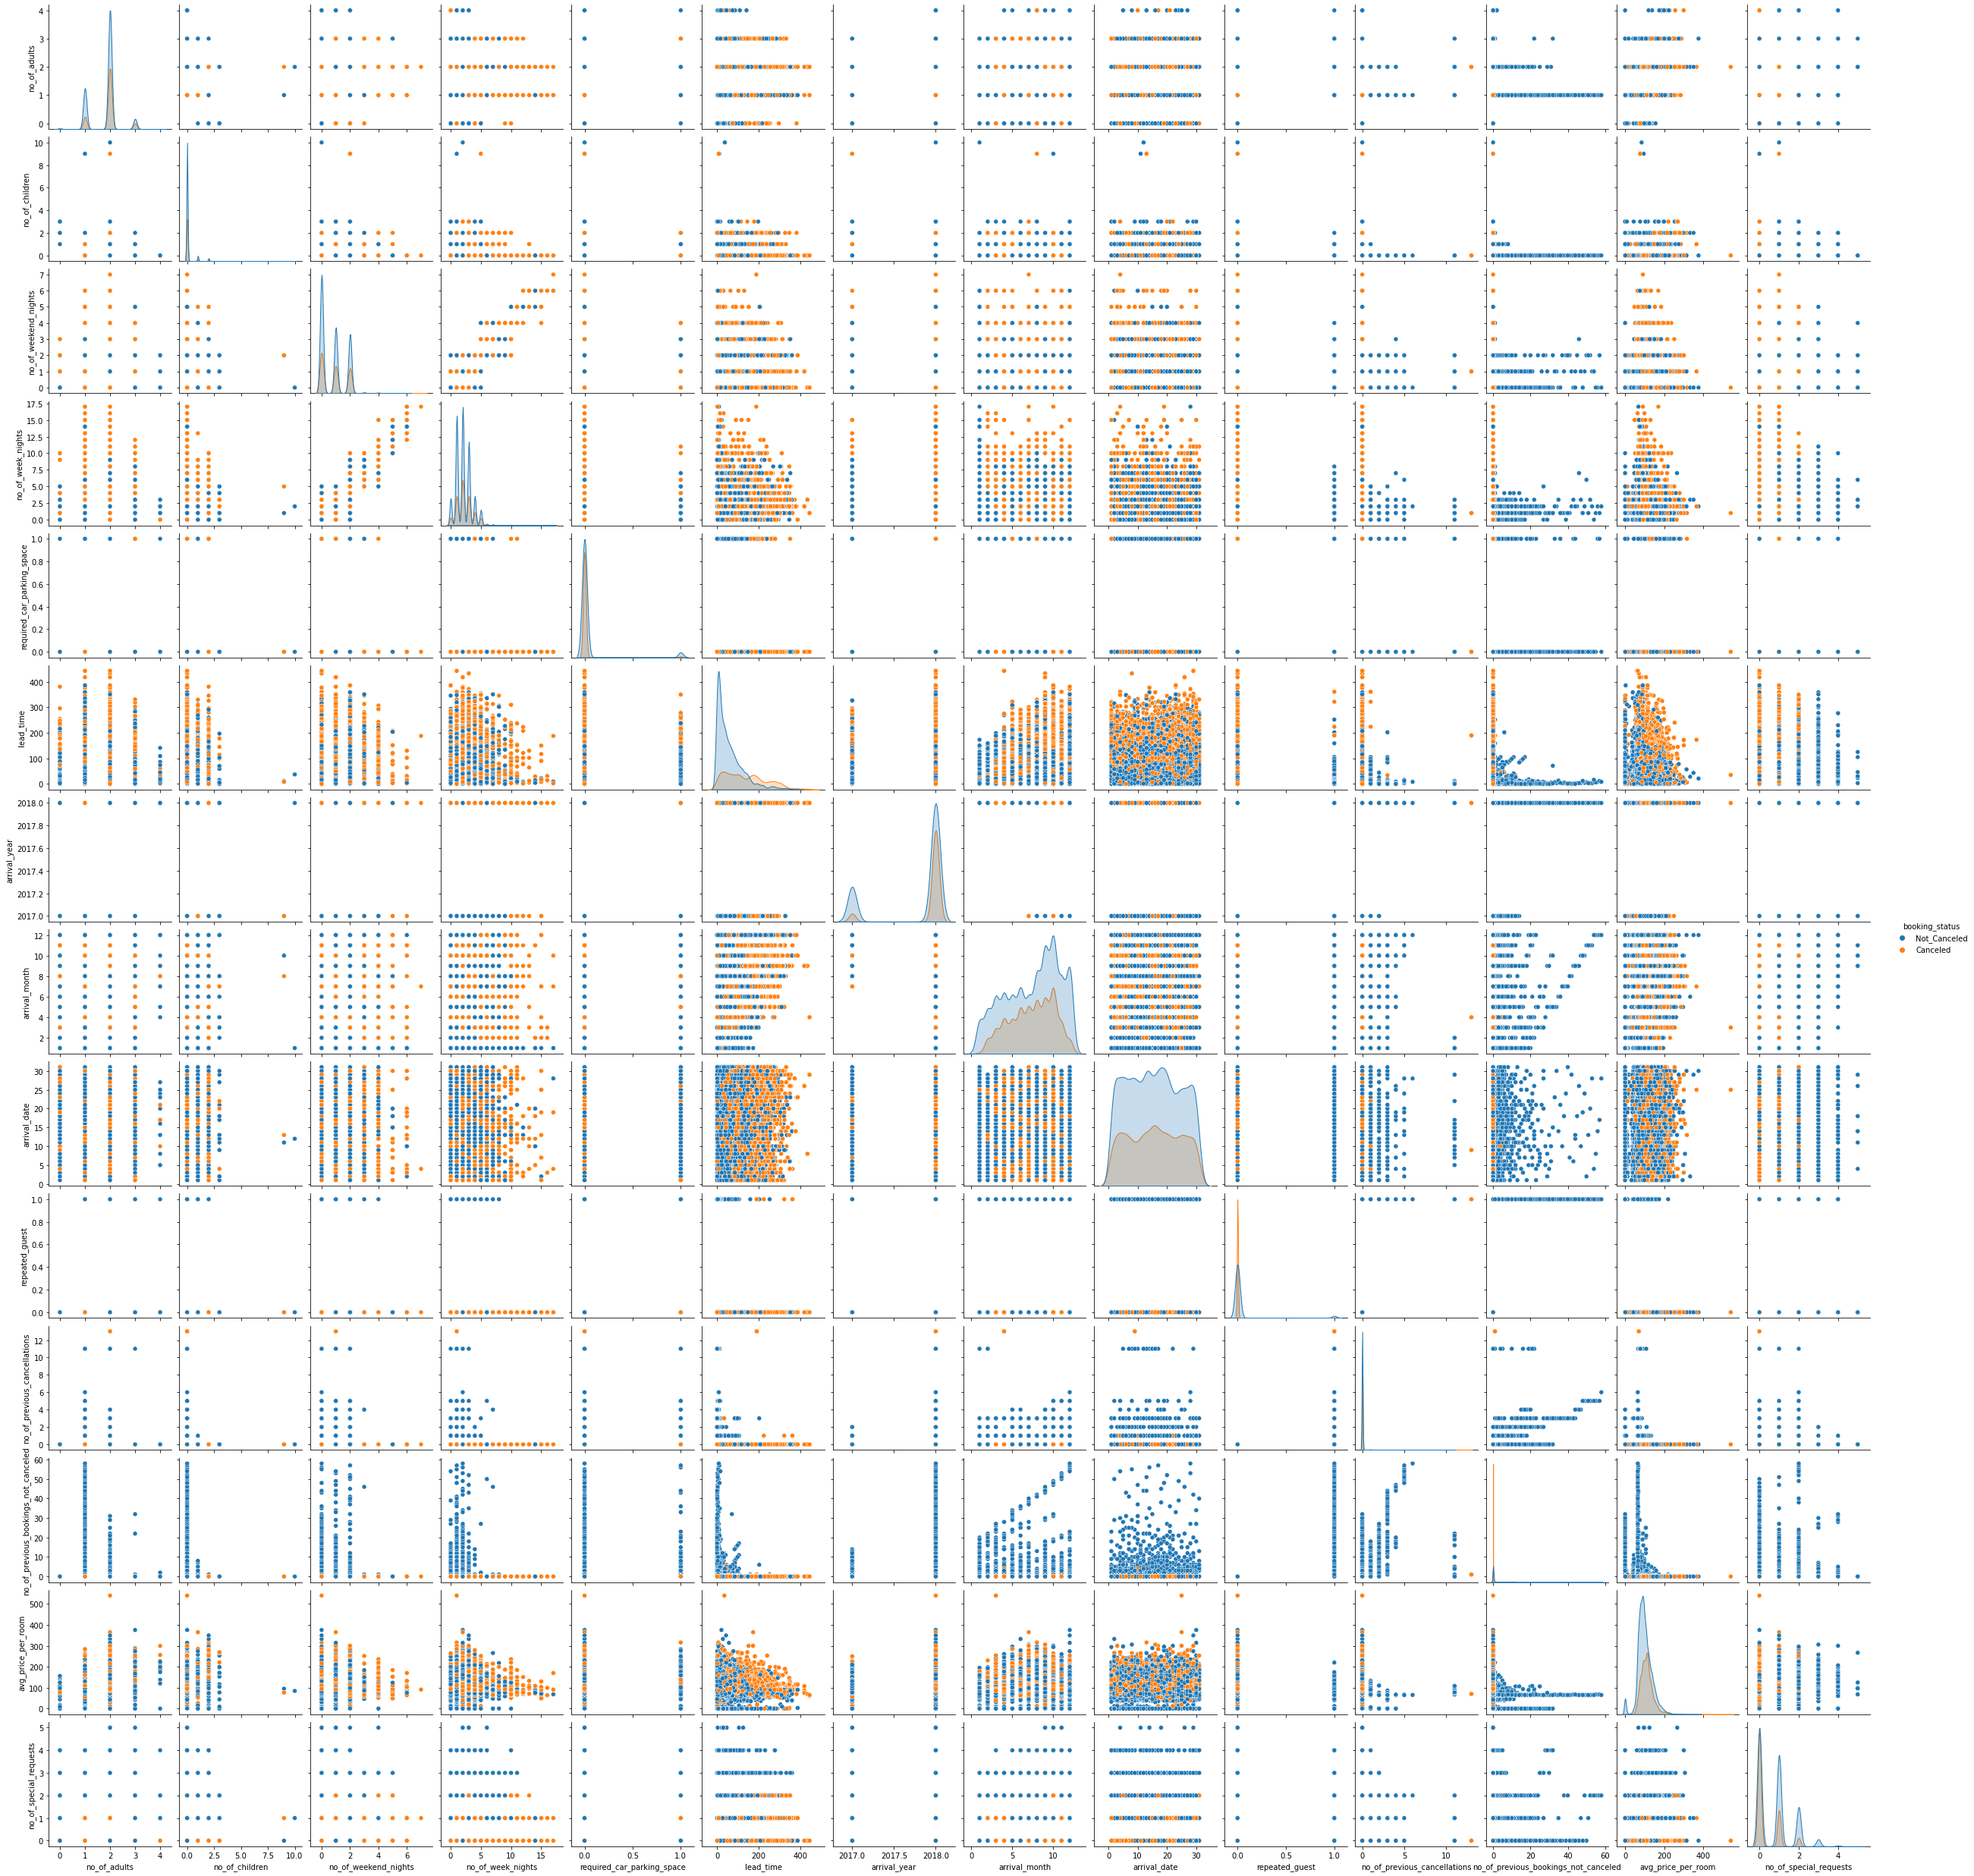

<IPython.core.display.Javascript object>

In [43]:
sns.pairplot(data=df, hue="booking_status")
plt.show()

### no_of_adults vs booking_status

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


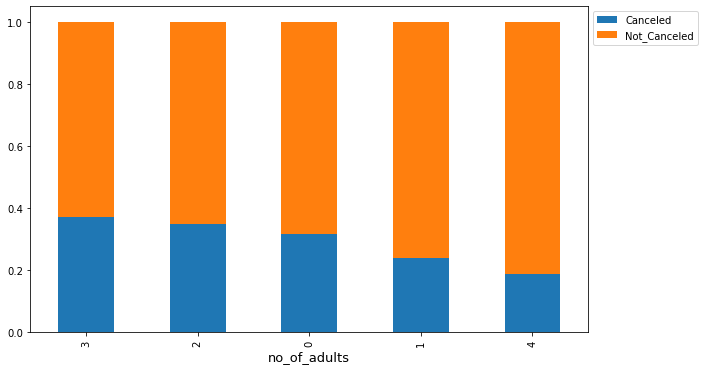

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df, "no_of_adults", "booking_status")

* There is no significant pattern in the number of cancellations with respect to the number of adults.

### no_of_children vs booking_status

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


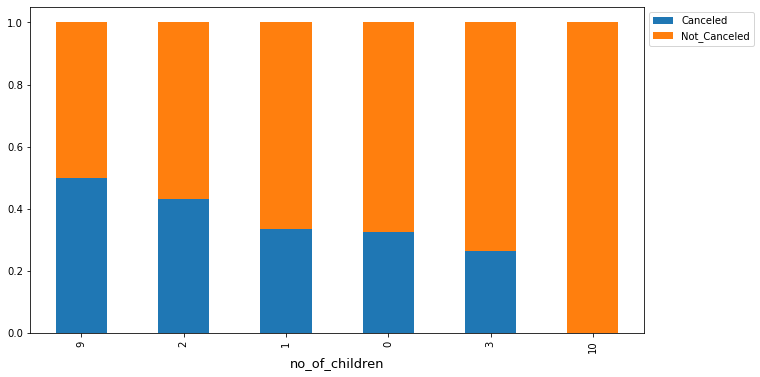

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(df, "no_of_children", "booking_status")

* There is no significant pattern in cancellation with respect to the number of children.

### no_of_weekend_nights vs booking_status

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


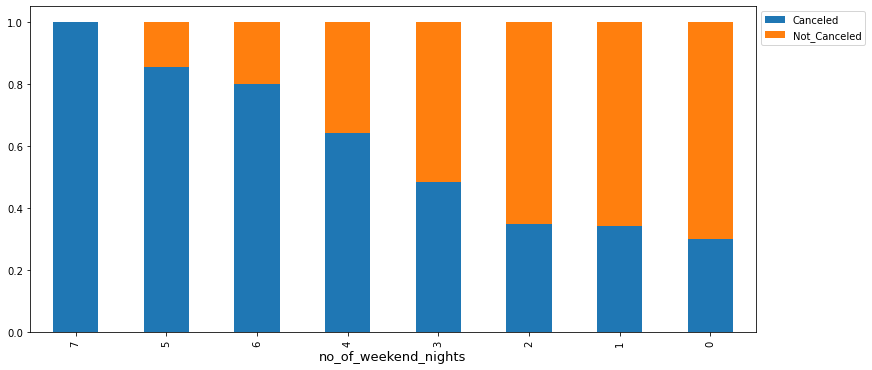

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(df, "no_of_weekend_nights", "booking_status")

* The cancellations are more when the number of weekend nights are more.

### no_of_week_nights vs booking_status

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

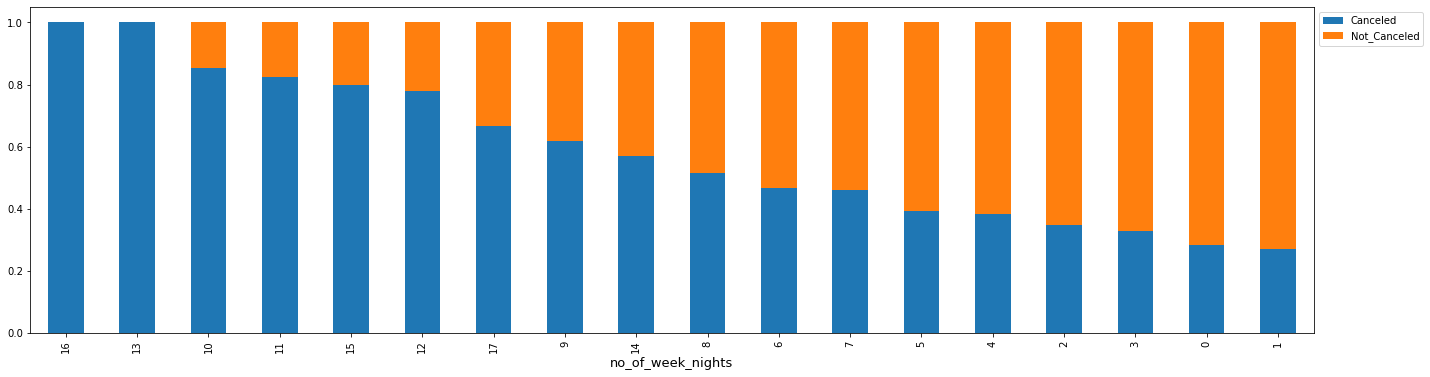

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(df, "no_of_week_nights", "booking_status")

* The cancellations are more when the number of week nights are more.

### arrival_year vs booking_status

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


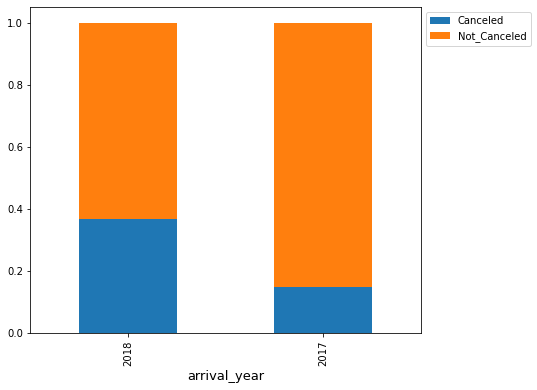

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "arrival_year", "booking_status")

* The percentage of cancellation in 2018 is more when compared to 2017.

### arrival_month vs booking_status

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


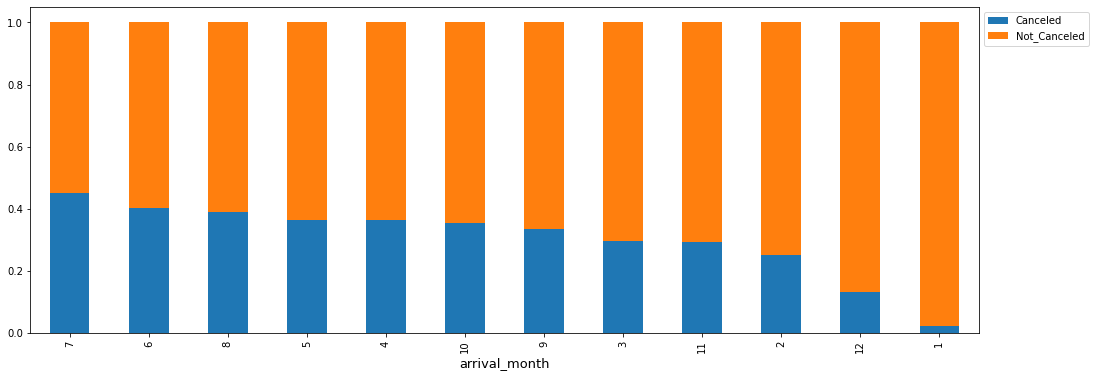

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(df, "arrival_month", "booking_status")

* The average number of cancellations is more during the month of July and June.
* But there are more number of bookings and cancellations during the month of October and September.

### arrival_date vs booking_status

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

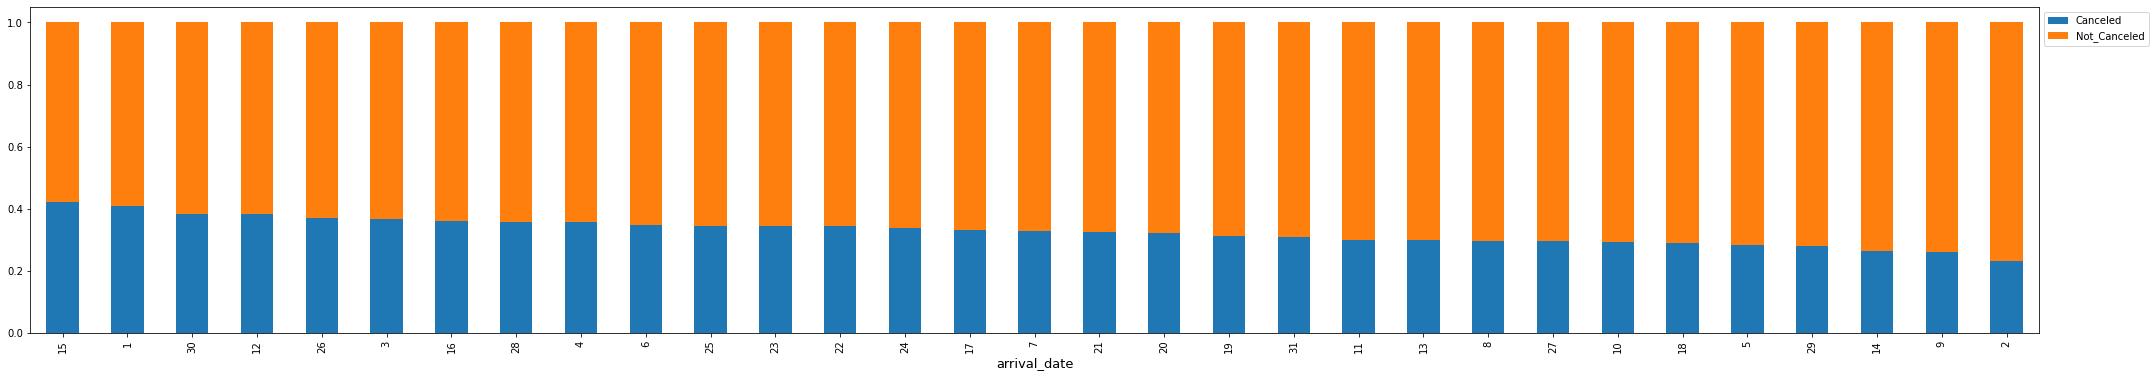

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(df, "arrival_date", "booking_status")

* There is almost similar distribution in the arrival day.

### market_segment_type vs booking_status

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


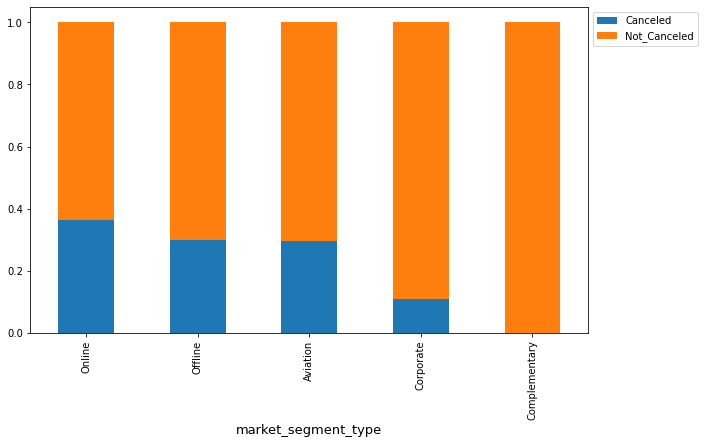

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(df, "market_segment_type", "booking_status")

* Online segment has the maximum cancellation rate, followed by Offline and Aviation segments.

### repeated_guest vs booking_status

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


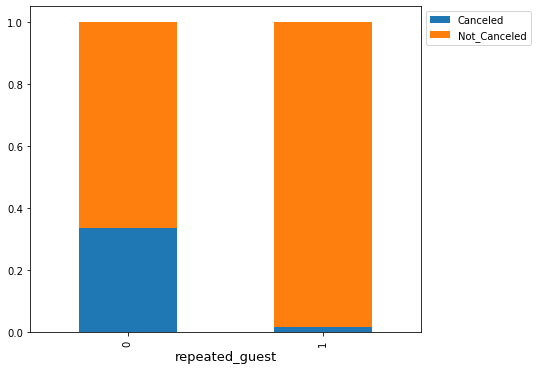

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(df, "repeated_guest", "booking_status")

* The percentage of cancellation by repeated guests is very less.

### type_of_meal_plan vs booking_status

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


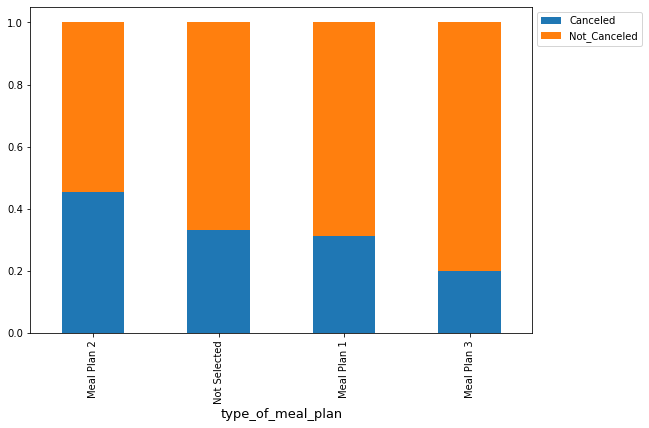

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(df, "type_of_meal_plan", "booking_status")

* The rate of cancellation for Meal_Plan 2 is more when compared to other type of meal plans.
* The number of guests who prefered Meal Plan 1 are more and more number of cancellations.

### room_type_reserved vs booking_status

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


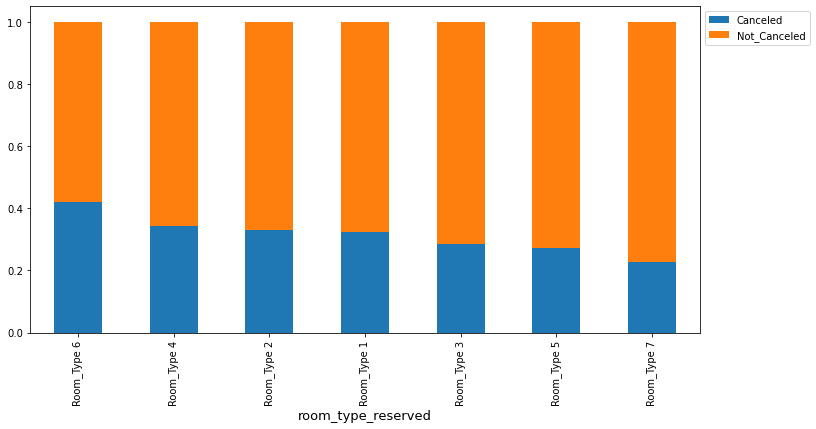

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(df, "room_type_reserved", "booking_status")

* ~40% of the guests who reserved Room type 6 canceled the booking.
* Room Type 1 was reserved by more number of guests and there are more number of cancellations.

### required_car_parking_space vs booking_status

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


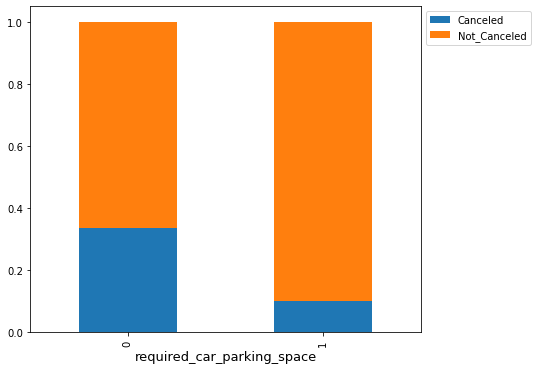

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(df, "required_car_parking_space", "booking_status")

* The rate of cancellation is less when the guests require car parking space.

### lead_time vs booking_status

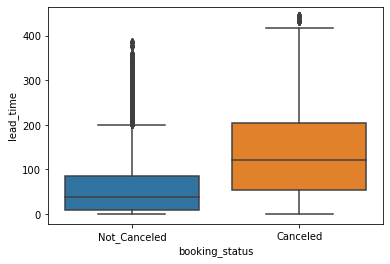

<IPython.core.display.Javascript object>

In [56]:
sns.boxplot(data=df, x="booking_status", y="lead_time")
plt.show()

* There are more cancellations when the lead time is more.
* There are few outliers in the data.

### avg_price_per_room vs booking_status

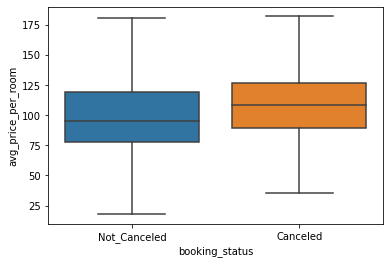

<IPython.core.display.Javascript object>

In [57]:
sns.boxplot(data=df, x="booking_status", y="avg_price_per_room", showfliers=False)
plt.show()

* The average price per room for canceled bookings is slightly more than the bookings that are not canceled.

### no_of_special_requests vs booking_status

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


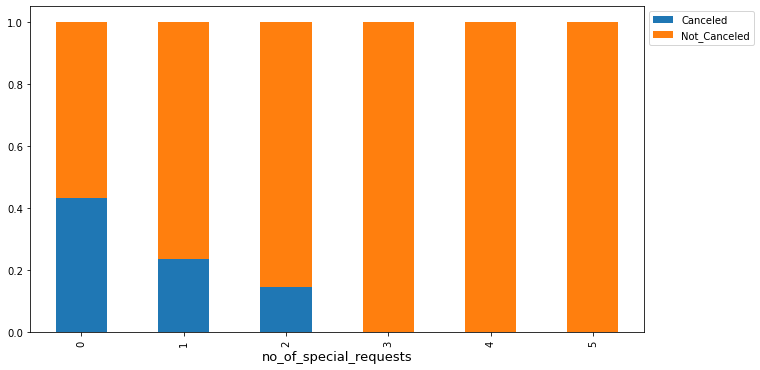

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "no_of_special_requests", "booking_status")

* When there are more special requests the cancellation of bookings is less.

### market_segment_type vs repeated_guest

repeated_guest           0    1    All
market_segment_type                   
All                  35345  930  36275
Corporate             1415  602   2017
Complementary          265  126    391
Online               23118   96  23214
Offline              10438   90  10528
Aviation               109   16    125
------------------------------------------------------------------------------------------------------------------------


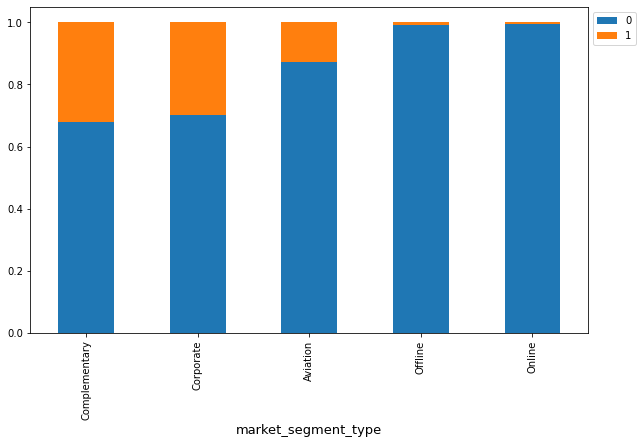

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(df, "market_segment_type", "repeated_guest")

#### Observations:
* Complimentary and Corporate segments have more returning guests.
* Online and Offline segments have very less returning guests.

### Multivariate Analysis

### arrival_month vs lead_time vs booking_status

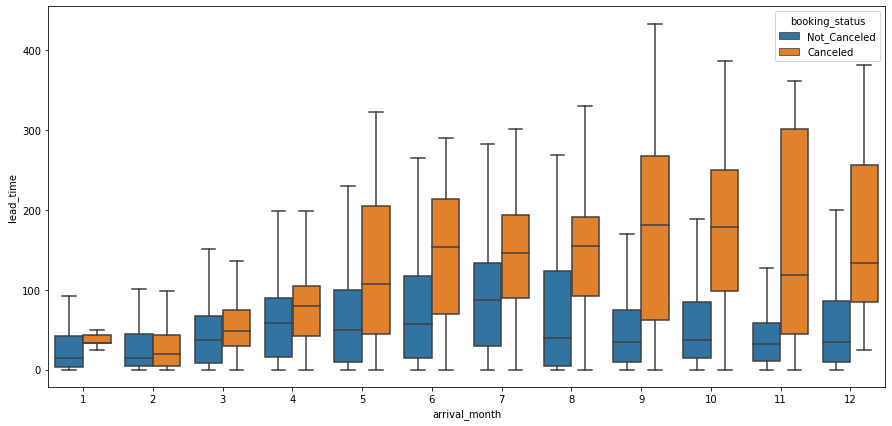

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    data=df, x="arrival_month", y="lead_time", hue="booking_status", showfliers=False
)
plt.show()

#### Observations:
* The lead time for bookings from January to April is less when compared to other months. Also, the cancellation is less during these months.
* From September to December, the lead time of bookings is more and there are more number of cancellations.

### market_segment_type vs avg_price_per_room vs booking_status

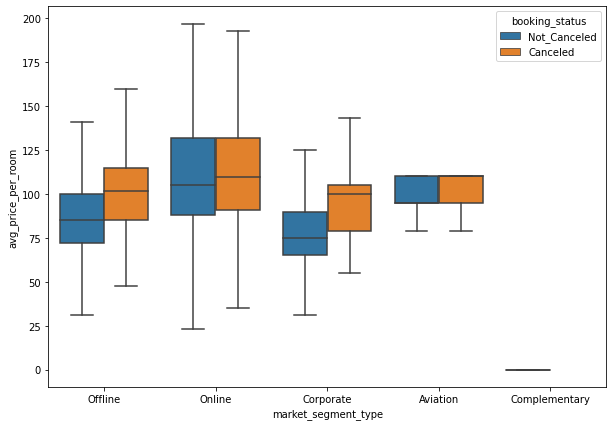

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df,
    x="market_segment_type",
    y="avg_price_per_room",
    hue="booking_status",
    showfliers=False,
)
plt.show()

#### Observations:
* The average price per room for canceled bookings are more in Offline, Online and Corporate segments.

### market_segment_type vs lead_time vs booking_status

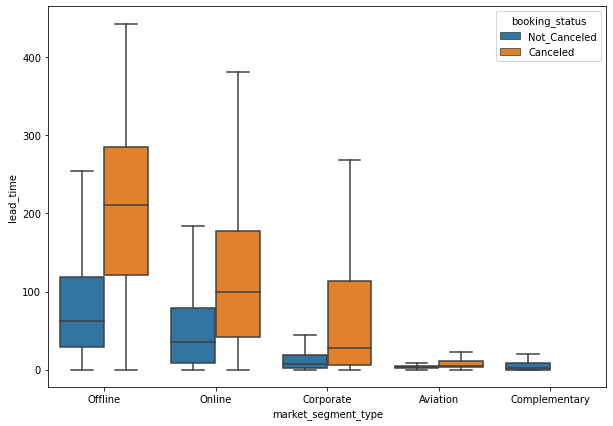

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(10, 7))
sns.boxplot(
    data=df,
    x="market_segment_type",
    y="lead_time",
    hue="booking_status",
    showfliers=False,
)
plt.show()

#### Observations:
* The average lead time for booking through Offline segment that got canceled is more.
* The bookings made through Offline segment have more lead time and more cancellation followed by Online and Corporate segments.

### Summary of EDA
**Data Description:**

- There are 36275 rows and 19 columns in the data.
- There are no missing values in the data.
- There are no duplicates in the data.
- There are 5 object type, 1 float type and other integer type variables in the data.
- The maximum number of adults per booking is 4 and the maximum number of children per booking is 10.
- The maximum number of weekend nights per booking is 7 and the maximum number of week nights per booking is 17.
- There are 4 unique meal plans and most users choose meal plan 1.
- There are 7 unique room types and most users choose room type 1.
- The average lead time is 85 days with a maximum lead time of 443.
- The data contains booking information from 2017 to 2018.
- There are 5 unique market segment types and most users prefer Online reservations.

**Observations from EDA:**
* `no_of_adults`: The number of adult guests range from 0-4 and most of the bookings have 2 adults.
* `no_of_children`: The number of children range from 0-10
* `no_of_weekend_nights`: The number of weekend nights in the booking data range from 0-7.
* `no_of_week_nights`: The number of weeknights range from 0 to 17 and most of the bookings are made for 2 week nights.
* `type_of_meal_plan`: 76.7% of guests choose Meal Plan 1. 9.1% of guests choose Meal Plan 2. 14.1% of guests didn't choose the type of meal plan.
* `required_car_parking_space`: 96.9% of the guests did not require car parking space
* `room_type_reserved`: 77.5% of the guests choose Room_Type 1. 16.7% of the guests choose Room_type 4. Less than 1% of guests choose Room_Type 3, 5, 7.
* `lead_time`: Average lead_time of bookings is 85 days. 50% of the guests book the hotels with a lead time of 57 days.
* `arrival_year`: The data contains information about bookings made in the year of 2018 and 2017/
* `arrival_month`: Most of the bookings are made in October followed by September. 14.7% of the bookings are made during October and 12.7% of the bookings are made in September
* `arrival_date`: The data of arrival date has a uniform distribution.
* `market_segment_type`: 64.0% of guests make the booking through Online segment. Only 0.3% of guests made the booking though Aviation segment.
* `repeated_guest`: Only 2.6% of the bookings are made by repeated guests.
* `no_of_previous_cancellations`: 99.1% of the bookings were made by guests who didn't make any previous cancellations
* `no_of_previous_bookings_not_canceled`: There is a aximum of 58 previous bookings that was not cancelled.
* `avg_price_per_room`: 
* `no_of_special_requests`: 
* `booking_status`: Most of the guests don't make special requests. One special request is made by approximately 11000 guests.

### Data Preparation

#### Encoding Canceled as 0 and Not_Canceled as 1 for booking status

In [63]:
df["booking_status"] = df["booking_status"].apply(
    lambda x: 1 if x == "Not_Canceled" else 0
)
df["booking_status"].value_counts()

1    24390
0    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [64]:
# Converting arrival_month from int to object
import calendar

df["arrival_month"] = df["arrival_month"].apply(lambda x: calendar.month_abbr[x])
df["arrival_month"].value_counts()

Oct    5317
Sep    4611
Aug    3813
Jun    3203
Dec    3021
Nov    2980
Jul    2920
Apr    2736
May    2598
Mar    2358
Feb    1704
Jan    1014
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

In [65]:
# Dropping columns "Booking_ID" and "arrival_date". These variables are not going to help the model
df.drop(["Booking_ID", "arrival_date"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [66]:
# creating dummy varibles
dummy_data = pd.get_dummies(
    df,
    columns=[
        "type_of_meal_plan",
        "room_type_reserved",
        "market_segment_type",
        "arrival_month",
        "arrival_year",
        "required_car_parking_space",
        "repeated_guest",
    ],
    drop_first=True,
)
dummy_data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   lead_time  no_of_previous_cancellations  \
0        224                             0   
1          5                             0   
2          1                             0   
3        211                             0   
4         48                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                       0               1                              0   
1                       1               1                              0   
2                       0               0                              0   
3                       0               0                              0   
4                       0               0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   market_segment_type_Offline  market_segment_type_Online  arrival_month_Aug  \
0                            1                           0                  0   
1                            0                           1                  0   
2                            0                           1                  0   
3                           

<IPython.core.display.Javascript object>

In [67]:
dummy_data.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
lead_time                                 int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
type_of_meal_plan_Meal Plan 2             uint8
type_of_meal_plan_Meal Plan 3             uint8
type_of_meal_plan_Not Selected            uint8
room_type_reserved_Room_Type 2            uint8
room_type_reserved_Room_Type 3            uint8
room_type_reserved_Room_Type 4            uint8
room_type_reserved_Room_Type 5            uint8
room_type_reserved_Room_Type 6            uint8
room_type_reserved_Room_Type 7            uint8
market_segment_type_Complementary         uint8
market_segment_type_Corporate           

<IPython.core.display.Javascript object>

### Split the data

In [68]:
X = dummy_data.drop(["booking_status"], axis=1)
Y = dummy_data["booking_status"].astype("int64")

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [69]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

In [70]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1    0.670644
0    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
1    0.676376
0    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

## Building a Logistic Regression model

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a guest will not cancel the booking, but in reality the guest will cancel the booking  - Loss of resources(revenue)

2. Predicting a customer will cancel the booking, but in reality the guest will not cancel the booking. - Additional expense and loss of revenue

### Which case is more important? 

* If we predict a booking that will be Canceled as Not Canceled and Not Canceled as Canceled are equally important.

### How to reduce this loss i.e need to reduce False Negatives and False Positives?
*  F1 score should be maximized, the greater the F1 score higher the chances of minimizing the false negatives and false positives.

## Model performance evaluation

In [71]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [72]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [73]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Checking model performance on training set

In [74]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [75]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.8069470699432892
Precision: 0.8343903380576849
Recall: 0.888484350226085
F1: 0.8605881349183778


<IPython.core.display.Javascript object>

### Checking performance on test set

In [76]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [77]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.807589818983736
Precision: 0.8386267198148386
Recall: 0.8860209210705067
F1: 0.8616726119698772


<IPython.core.display.Javascript object>

#### Observations:
* The training and testing f1_scores are 0.86.
* f1_score on the train and test sets are comparable.
* This shows that the model is showing generalised results.

We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

### Logistic Regression (with statsmodels library)

In [78]:
X = dummy_data.drop(["booking_status"], axis=1)
Y = dummy_data["booking_status"].astype("int64")

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [79]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25355
Method:                           MLE   Df Model:                           36
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3491
Time:                        23:54:06   Log-Likelihood:                -10475.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    3.2008      0.269     11.918      0.000       2.674       3.727
no_of_adults                            -0.1538      

<IPython.core.display.Javascript object>

In [80]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.807065  0.888191   0.834713  0.860622

<IPython.core.display.Javascript object>

#### Observations:
- Negative values of the coefficient shows that probability of customer cancelling the booking decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer cancelling the booking increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

- There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Multicollinearity

In [81]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   338.582802
no_of_adults                              1.386539
no_of_children                            2.006784
no_of_weekend_nights                      1.077140
no_of_week_nights                         1.104677
lead_time                                 1.545787
no_of_previous_cancellations              1.407401
no_of_previous_bookings_not_canceled      1.656856
avg_price_per_room                        2.535725
no_of_special_requests                    1.252679
type_of_meal_plan_Meal Plan 2             1.292936
type_of_meal_plan_Meal Plan 3             1.025514
type_of_meal_plan_Not Selected            1.281180
room_type_reserved_Room_Type 2            1.103064
room_type_reserved_Room_Type 3            1.003705
room_type_reserved_Room_Type 4            1.368555
room_type_reserved_Room_Type 5            1.028771
room_type_reserved_Room_Type 6            2.002475
room_type_reserved_Room_Type 7            1.120

<IPython.core.display.Javascript object>

#### Observations:
* market_segment_type_Online, market_segment_type_Offline and market_segment_type_Corporate have high VIF values.
* We will drop market_segment_type_Online as it has the high VIF value and check for the VIF values again.

In [82]:
X_train1 = X_train.drop(["market_segment_type_Online"], axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   51.372549
no_of_adults                             1.371426
no_of_children                           2.006219
no_of_weekend_nights                     1.076745
no_of_week_nights                        1.103961
lead_time                                1.539054
no_of_previous_cancellations             1.407223
no_of_previous_bookings_not_canceled     1.656579
avg_price_per_room                       2.532088
no_of_special_requests                   1.247729
type_of_meal_plan_Meal Plan 2            1.292313
type_of_meal_plan_Meal Plan 3            1.025514
type_of_meal_plan_Not Selected           1.279091
room_type_reserved_Room_Type 2           1.102938
room_type_reserved_Room_Type 3           1.003705
room_type_reserved_Room_Type 4           1.362895
room_type_reserved_Room_Type 5           1.028770
room_type_reserved_Room_Type 6           2.001898
room_type_reserved_Room_Type 7           1.120139
market_segment_

<IPython.core.display.Javascript object>

* Removal of market_segment_type_Online has fixed the multicollinearity in the data.

In [83]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(maxiter=1000)

print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

         Current function value: 0.412555
         Iterations: 1000
Training performance:


Accuracy    Recall  Precision        F1
0  0.807065  0.887897   0.834898  0.860582

<IPython.core.display.Javascript object>

In [84]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'arrival_month_Aug', 'arrival_month_Dec', 'arrival_month_Feb', 'arrival_month_Jan', 'arrival_month_Jul', 'arrival_month_Jun', 'arrival_month_Mar', 'arrival_month_May', 'arrival_month_Nov', 'arrival_month_Sep', 'arrival_year_2018', 'required_car_parking_space_1', 'repeated_guest_1']


<IPython.core.display.Javascript object>

In [85]:
X_train2 = X_train1[selected_features]

<IPython.core.display.Javascript object>

In [86]:
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25361
Method:                           MLE   Df Model:                           30
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.3481
Time:                        23:54:21   Log-Likelihood:                -10490.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6030      0.120     30.037      0.000       3.368       3.838
no_of_adults                      -0.1510      0.039     -3.922      0.

<IPython.core.display.Javascript object>

#### Observations:
* Now no feature has p-value greater than 0.05, so we'll consider the features in X_train5 as the final ones and lg5 as final model.

### Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [87]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           36.70666      0.859853        0.812666              0.887898   
Change_odd%  3570.66605    -14.014683      -18.733426            -11.210194   

             no_of_week_nights  lead_time  no_of_previous_cancellations  \
Odds                  0.950409   0.984014                      0.741763   
Change_odd%          -4.959120  -1.598645                    -25.823665   

             avg_price_per_room  no_of_special_requests  \
Odds                   0.981081                4.576558   
Change_odd%           -1.891912              357.655818   

             type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
Odds                              0.820057                        0.745150   
Change_odd%                     -17.994280                      -25.484988   

             room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
Odds                               1.380337                        1.324470   
Change_odd%                       38.033660                       32.447016   

             room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds                               2.202961                        2.675841   
Change_odd%                      120.296114                      167.584101   

             room_type_reserved_Room_Type 7  market_segment_type_Corporate  \
Odds                               4.225973                       2.159763   
Change_odd%                      322.597272                     115.976334   

             market_segment_type_Offline  arrival_month_Aug  \
Odds                            6.209334           1.252963   
Change_odd%                   520.933433          25.296304   

             arrival_month_Dec  arrival_month_Feb  arrival_month_Jan  \
Odds                  4.635969           0.606487          10.620901   
Change_odd%         363.596914         -39.351341         962.090135   

             arrival_month_Jul  arrival_month_Jun  arrival_month_Mar  \
Odds                  1.262393           1.146061           0.746417   
Change_odd%          26.239320          14.606064         -25.358261   

             arrival_month_May  arrival_month_Nov  arrival_month_Sep  \
Odds                  1.443959           0.709125           1.329242   
Change_odd%          44.395851         -29.087549          32.924165   

             arrival_year_2018  required_car_parking_space_1  repeated_guest_1  
Odds                  0.606983                      4.854265         16.657723  
Change_odd%         -39.301737                    385.426486       1565.772294

<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_adults`: Holding all other features constant a 1 unit change in no_of_adults will decrease the odds of a person cancelling the booking by 0.86 times or a 14.01% decrease in odds of a person cancelling the booking.
* `no_of_weekend_nights`: Holding all other features constant a 1 unit change in no_of_weekend_nights will decrease the odds of a person cancelling the booking by 0.88 times or a 11.2% decrease in odds of a person cancelling the booking.
`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

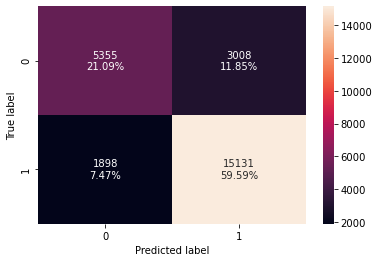

<IPython.core.display.Javascript object>

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [89]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.80679  0.888543   0.834169  0.860498

<IPython.core.display.Javascript object>

#### ROC-AUC

ROC-AUC on training set

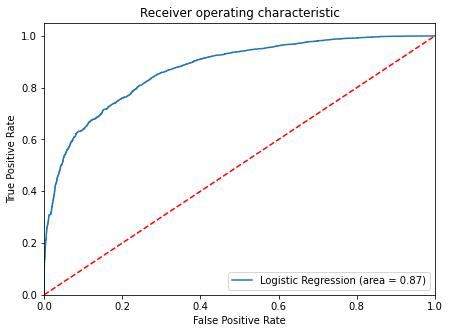

<IPython.core.display.Javascript object>

In [90]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

#### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [91]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.6444577074913788


<IPython.core.display.Javascript object>

#### Checking model performance on training set

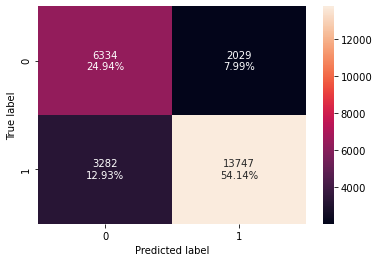

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [93]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy   Recall  Precision        F1
0   0.79084  0.80727   0.871387  0.838104

<IPython.core.display.Javascript object>

* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

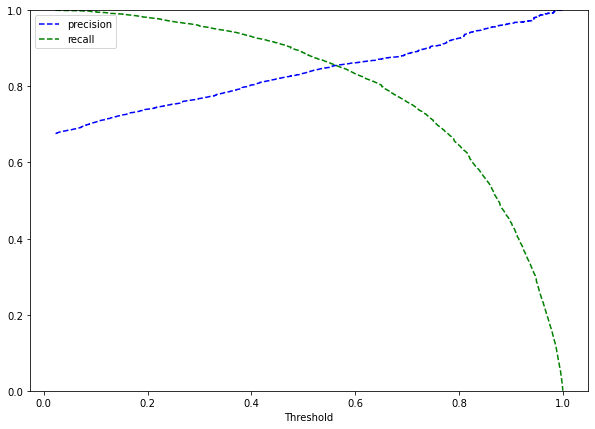

<IPython.core.display.Javascript object>

In [94]:
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of 0.58, we get balanced recall and precision.

In [95]:
# setting the threshold
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

#### Checking model performance on training set

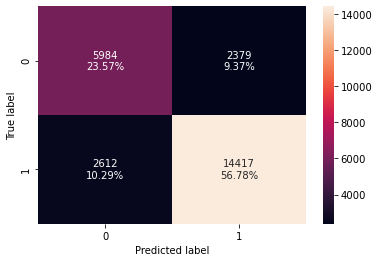

<IPython.core.display.Javascript object>

In [96]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [97]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.803442  0.846615   0.858359  0.852446

<IPython.core.display.Javascript object>

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we got 0.57 as the optimal threshold.

### Model Performance Summary

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.806790                            0.790840   
Recall                        0.888543                            0.807270   
Precision                     0.834169                            0.871387   
F1                            0.860498                            0.838104   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.803442  
Recall                               0.846615  
Precision                            0.858359  
F1                                   0.852446

<IPython.core.display.Javascript object>

#### Let's check the performance on the test set

Dropping the columns from the test set that were dropped from the training set

In [99]:
X_test2 = X_test[list(X_train2.columns)]

<IPython.core.display.Javascript object>

#### Using model with default threshold

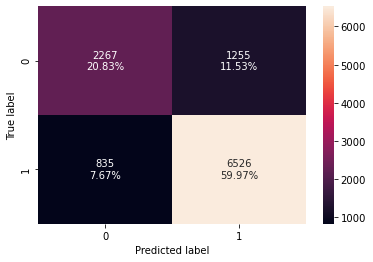

<IPython.core.display.Javascript object>

In [100]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test)

In [101]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.807957  0.886564    0.83871  0.861973

<IPython.core.display.Javascript object>

#### ROC curve on test set

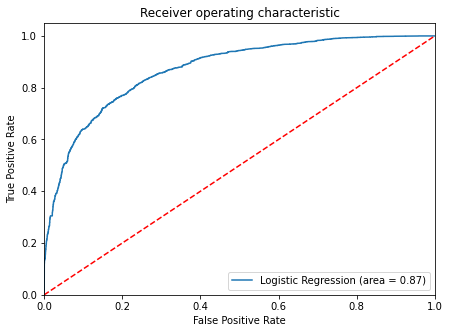

<IPython.core.display.Javascript object>

In [102]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Using model with threshold=0.76

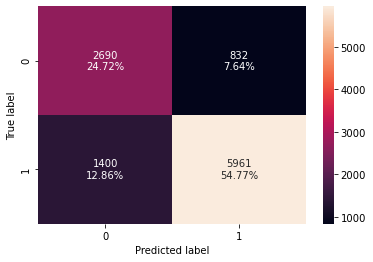

<IPython.core.display.Javascript object>

In [103]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [104]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0  0.794909  0.809808   0.877521  0.842306

<IPython.core.display.Javascript object>

#### Using model with threshold = 0.57

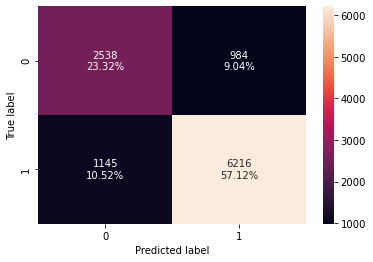

<IPython.core.display.Javascript object>

In [105]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [106]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy   Recall  Precision        F1
0  0.804374  0.84445   0.863333  0.853788

<IPython.core.display.Javascript object>

## Final Model Summary

In [107]:
# training performance comparison

models_train_comp_df_log = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df_log.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df_log

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.806790                            0.790840   
Recall                        0.888543                            0.807270   
Precision                     0.834169                            0.871387   
F1                            0.860498                            0.838104   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.803442  
Recall                               0.846615  
Precision                            0.858359  
F1                                   0.852446

<IPython.core.display.Javascript object>

In [108]:
# testing performance comparison

models_test_comp_df_log = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df_log.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df_log

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.807957                            0.794909   
Recall                        0.886564                            0.809808   
Precision                     0.838710                            0.877521   
F1                            0.861973                            0.842306   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.804374  
Recall                               0.844450  
Precision                            0.863333  
F1                                   0.853788

<IPython.core.display.Javascript object>

### Conclusion - Logistsic Regression

* We have been able to build a predictive model that can be used to predict the guests who will be cancelling the hotel booking with an f1_score of 0.86 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of no_of_special_requests, few types of room_type, market segment type of Corporate and Offline, few arrival months, required_car_parking_space_1 and repeated_guest_1 are positive and increase in these will lead to increase in chances of a guest not cancelling the booking of hotel. 

* Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, few types of meal plan and few months of arrival are negative and increase in these will lead to decrease in chances of a guest not cancelling the booking of hotel.

## Building a Decision Tree model

In [109]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [110]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

In [111]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)


##  Function to calculate precision score
def get_precision_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return precision_score(target, prediction)


##  Function to calculate F1 score
def get_f1_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return f1_score(target, prediction)

<IPython.core.display.Javascript object>

In [112]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

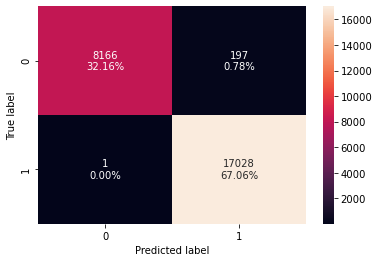

<IPython.core.display.Javascript object>

In [113]:
confusion_matrix_sklearn(model, X_train, y_train)

In [114]:
decision_tree_perf_train_recall = get_recall_score(model, X_train, y_train)
decision_tree_perf_train_precision = get_precision_score(model, X_train, y_train)
decision_tree_perf_train_f1score = get_f1_score(model, X_train, y_train)
print("Recall Score:", decision_tree_perf_train_recall)
print("Precision Score:", decision_tree_perf_train_precision)
print("F1 Score:", decision_tree_perf_train_f1score)

Recall Score: 0.999941276645722
Precision Score: 0.9885631349782293
F1 Score: 0.9942196531791908


<IPython.core.display.Javascript object>

#### Observations:
* The model is able to perfectly classify 99% of the data points on the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

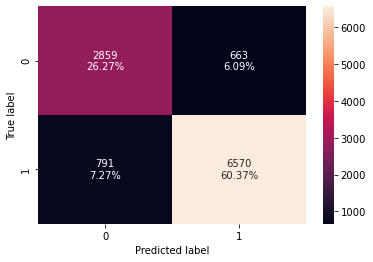

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(model, X_test, y_test)

In [116]:
decision_tree_perf_test_recall = get_recall_score(model, X_test, y_test)
decision_tree_perf_test_precision = get_precision_score(model, X_test, y_test)
decision_tree_perf_test_f1score = get_f1_score(model, X_test, y_test)

print("Recall Score:", decision_tree_perf_test_recall)
print("Precision Score:", decision_tree_perf_test_precision)
print("F1 Score:", decision_tree_perf_test_f1score)

Recall Score: 0.8925417742154599
Precision Score: 0.9083367897138117
F1 Score: 0.9003700150746882


<IPython.core.display.Javascript object>

* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#### Visualizing the Decision Tree

In [117]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

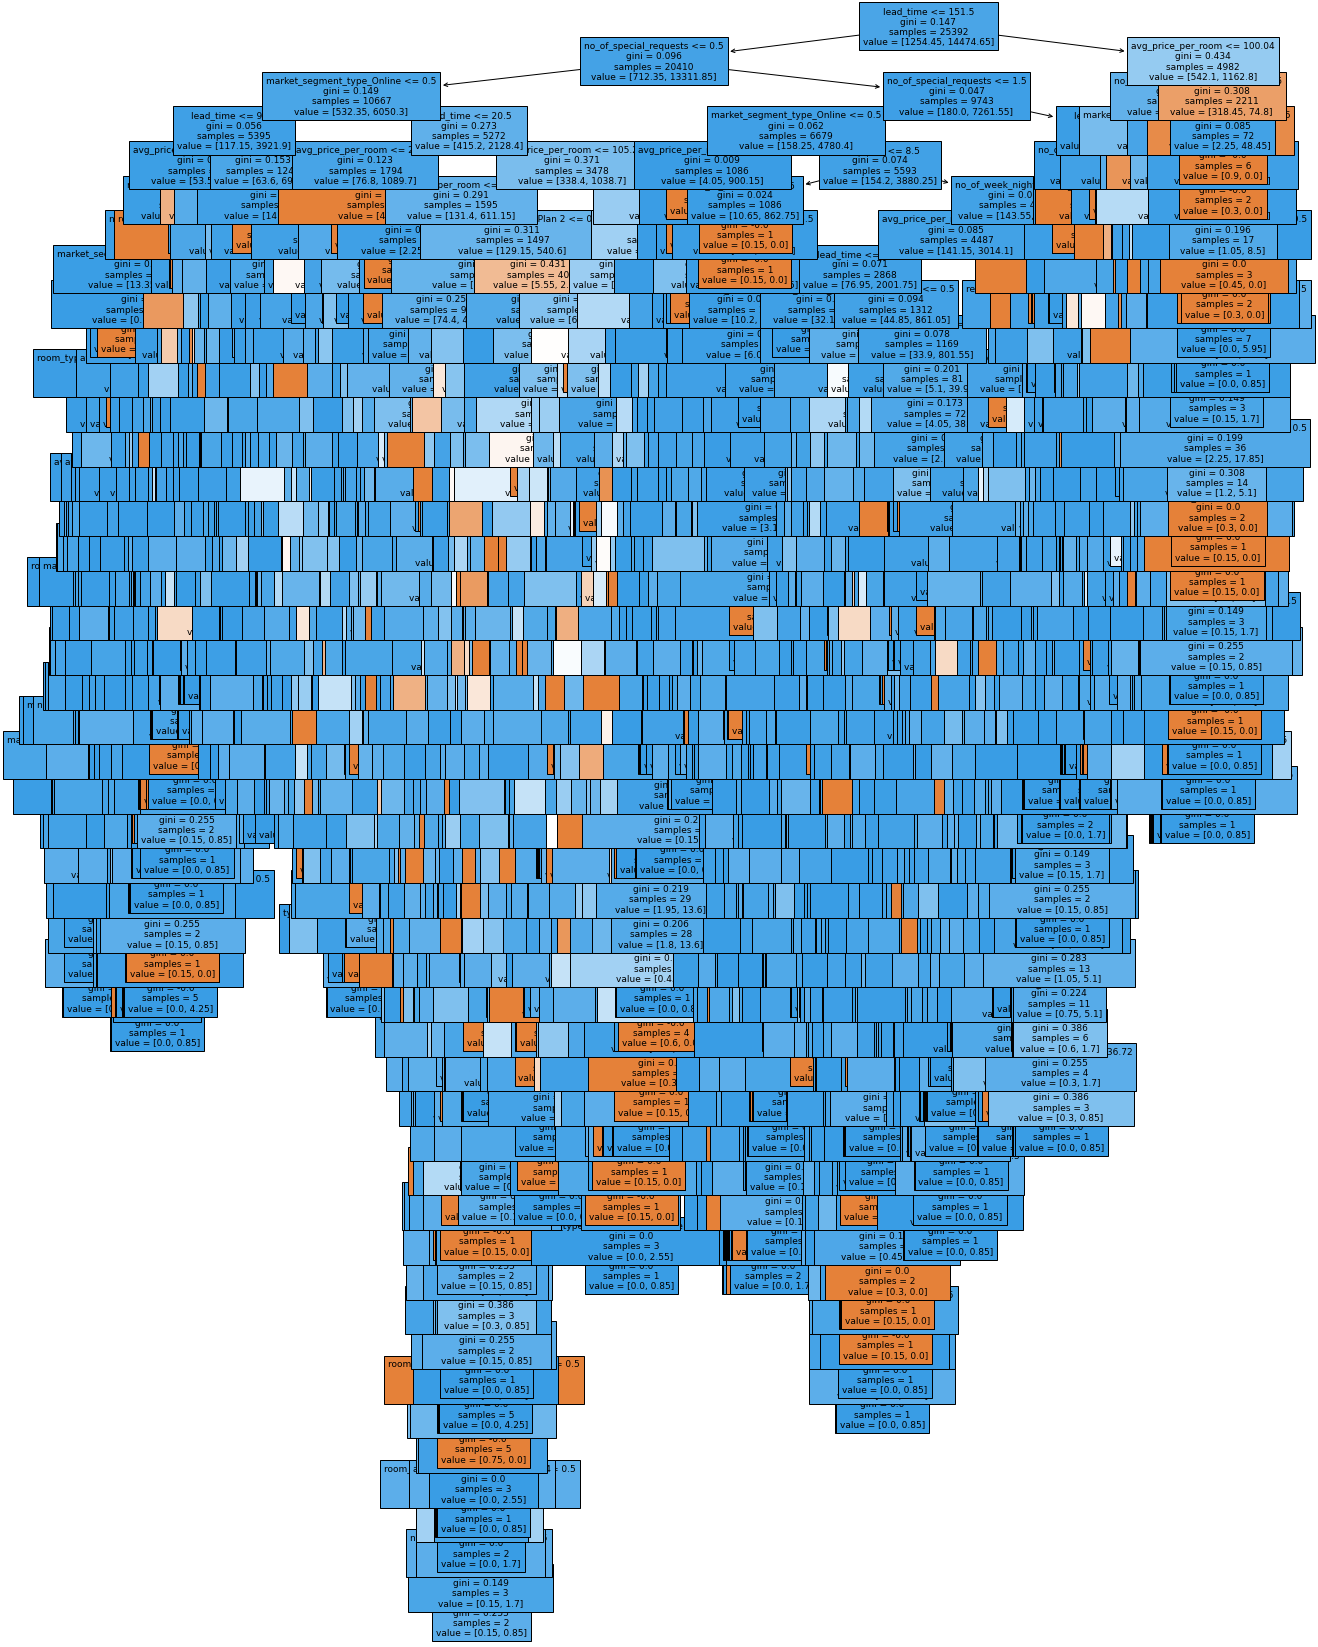

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [119]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 215.61
|   |   |   |   |   |--- no_of_weekend_nights <= 4.50
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 192.19
|   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   |   |   |   |

<IPython.core.display.Javascript object>

In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.291619
avg_price_per_room                    0.271343
market_segment_type_Online            0.067441
no_of_week_nights                     0.065595
no_of_special_requests                0.045665
no_of_weekend_nights                  0.043986
arrival_month_Dec                     0.043905
no_of_adults                          0.026098
arrival_month_Nov                     0.015263
arrival_month_Aug                     0.011629
arrival_month_Jun                     0.011569
arrival_month_May                     0.011143
type_of_meal_plan_Not Selected        0.009856
arrival_month_Jul                     0.009807
room_type_reserved_Room_Type 4        0.009432
arrival_month_Sep                     0.009129
type_of_meal_plan_Meal Plan 2         0.008539
arrival_month_Oct                     0.008481
arrival_month_Mar                     0.007409
no_of_children                        0.007230
arrival_year_

<IPython.core.display.Javascript object>

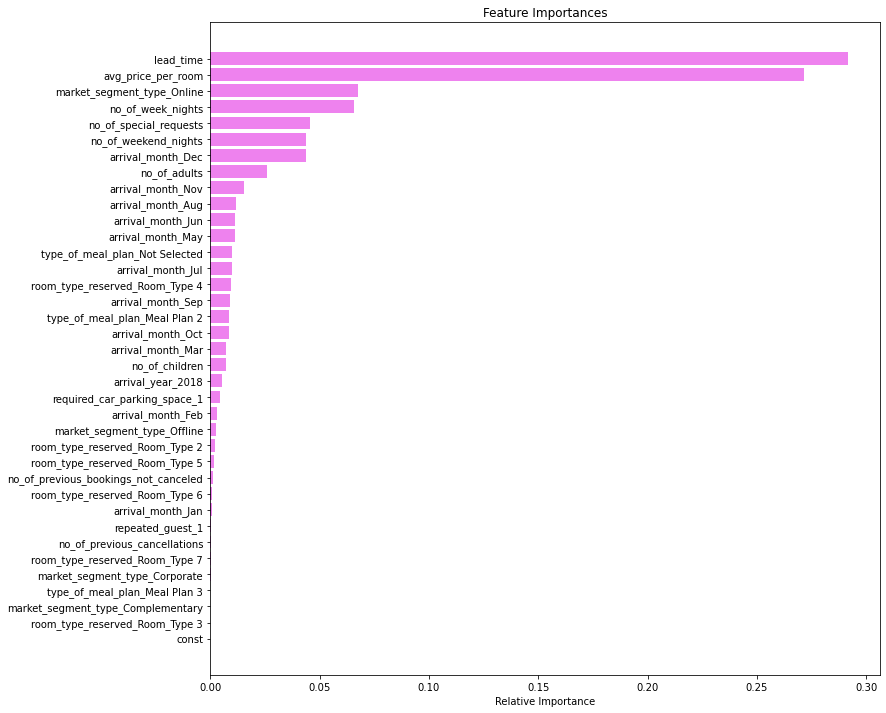

<IPython.core.display.Javascript object>

In [121]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observations:
* According to the decision tree model, lead_time is the most important variable for predicting the cacellation of hotel booking.

## Do we need to prune the tree?

* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting. Hence, we need to prune the tree.

#### Using GridSearch for Hyperparameter tuning of our tree model

In [122]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=1e-06,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

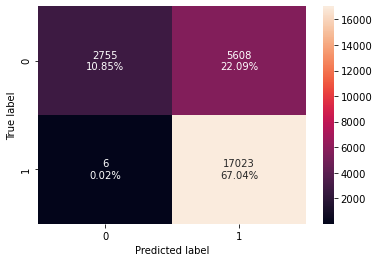

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [124]:
decision_tree_tune_perf_train_recall = get_recall_score(estimator, X_train, y_train)
decision_tree_tune_perf_train_precision = get_precision_score(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train_f1score = get_f1_score(estimator, X_train, y_train)

print("Recall Score:", decision_tree_tune_perf_train_recall)
print("Precision Score:", decision_tree_tune_perf_train_precision)
print("F1 Score:", decision_tree_tune_perf_train_f1score)

Recall Score: 0.999647659874332
Precision Score: 0.7521983120498431
F1 Score: 0.8584467977811396


<IPython.core.display.Javascript object>

#### Checking performance on test set

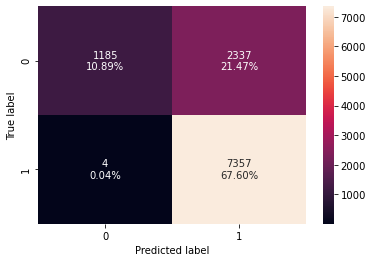

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [126]:
decision_tree_tune_perf_test_recall = get_recall_score(estimator, X_test, y_test)
decision_tree_tune_perf_test_precision = get_precision_score(estimator, X_test, y_test)
decision_tree_tune_perf_test_f1score = get_f1_score(estimator, X_test, y_test)

print("Recall Score:", decision_tree_tune_perf_test_recall)
print("Precision Score:", decision_tree_tune_perf_test_precision)
print("F1 Score:", decision_tree_tune_perf_test_f1score)

Recall Score: 0.9994565955712539
Precision Score: 0.7589230451825871
F1 Score: 0.862738199941366


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

### Visualizing the Decision Tree

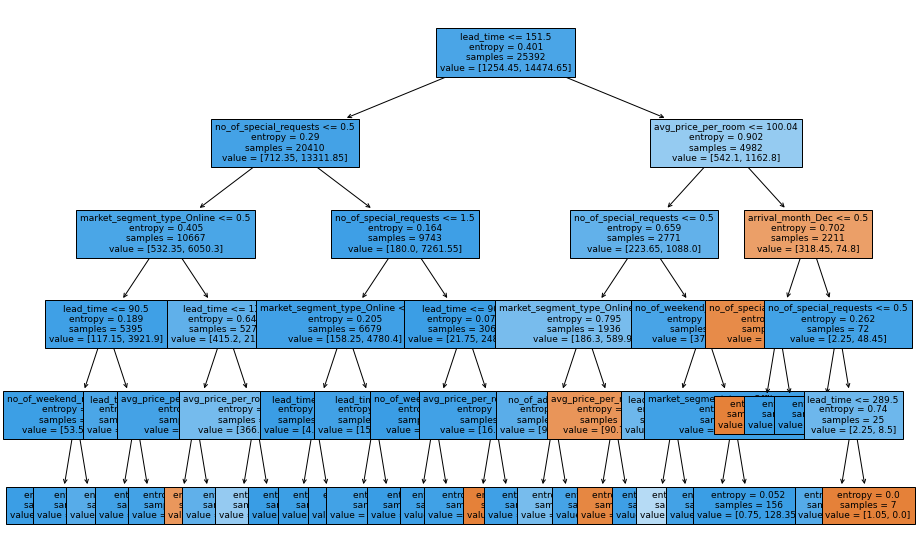

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- weights: [15.60, 1980.50] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- weights: [37.95, 1242.70] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- weights: [50.70, 339.15] class: 1
|   |   |   |   |--- lead_time >  117.50
|   |   |   |   |   |--- weights: [12.90, 359.55] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 202.67
|   |   |   |   |   |--- weights: [44.40, 921.40] class: 1
|   |   |   |   |--- avg_price_per_room >  202.67
|   |   |   |   |   |--- weights: [4.80, 0.85] class: 0
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- avg_price_per_room <= 105.27
|   |   | 

<IPython.core.display.Javascript object>

#### Observations from the tree:

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.380457
avg_price_per_room                    0.191568
market_segment_type_Online            0.179146
no_of_special_requests                0.155122
arrival_month_Dec                     0.050322
no_of_adults                          0.019959
no_of_weekend_nights                  0.015070
no_of_week_nights                     0.006580
market_segment_type_Offline           0.001778
arrival_month_Jun                     0.000000
arrival_month_Aug                     0.000000
arrival_month_Feb                     0.000000
arrival_month_Jan                     0.000000
arrival_month_Jul                     0.000000
const                                 0.000000
arrival_month_Mar                     0.000000
arrival_month_May                     0.000000
arrival_month_Oct                     0.000000
arrival_month_Sep                     0.000000
arrival_year_2018                     0.000000
required_car_

<IPython.core.display.Javascript object>

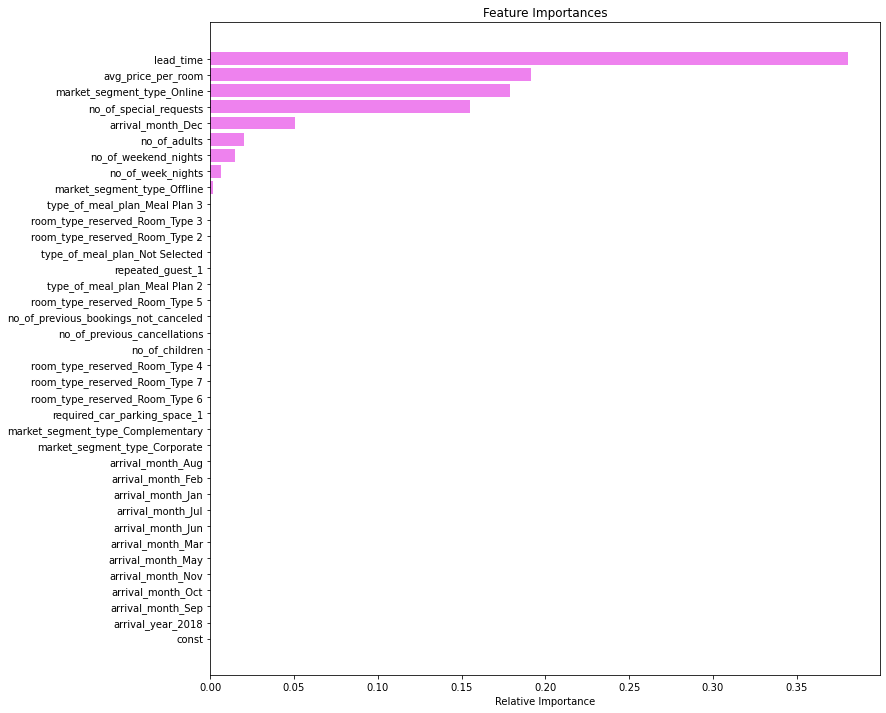

<IPython.core.display.Javascript object>

In [130]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree lead_time is the most important feature followed by avg_price_per_room.

### Cost Complexity Pruning

In [131]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [132]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.003203
1     6.352561e-21    0.003203
2     6.352561e-21    0.003203
3     6.352561e-21    0.003203
4     6.352561e-21    0.003203
...            ...         ...
1622  2.533780e-03    0.102672
1623  3.092749e-03    0.105765
1624  3.583279e-03    0.112931
1625  4.335796e-03    0.117267
1626  1.475920e-02    0.146786

[1627 rows x 2 columns]

<IPython.core.display.Javascript object>

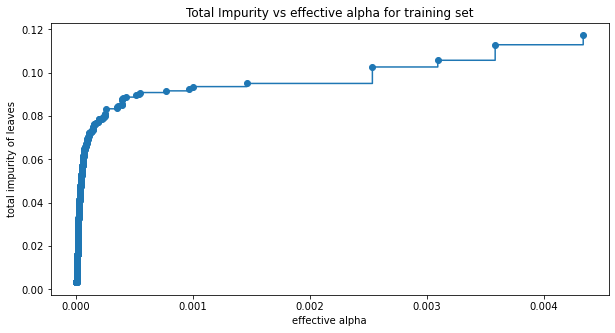

<IPython.core.display.Javascript object>

In [133]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [134]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.014759203125358188


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

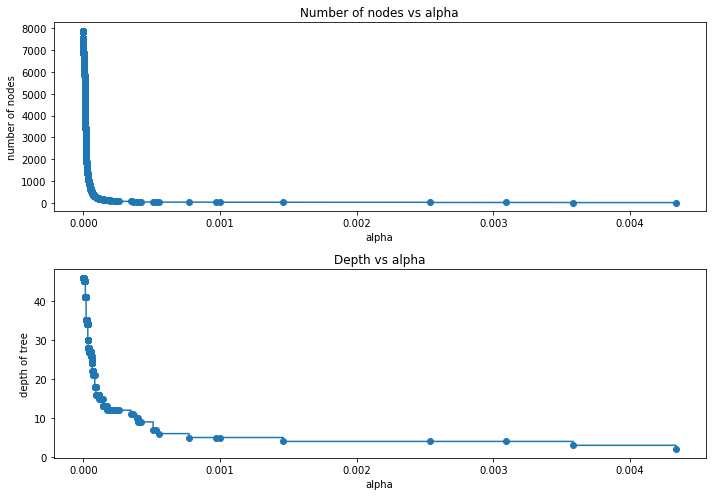

<IPython.core.display.Javascript object>

In [135]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [136]:
recall_train = []
precision_train = []
f1score_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train_recall = recall_score(y_train, pred_train)
    values_train_precision = precision_score(y_train, pred_train)
    values_train_f1score = f1_score(y_train, pred_train)
    recall_train.append(values_train_recall)
    precision_train.append(values_train_precision)
    f1score_train.append(values_train_f1score)

<IPython.core.display.Javascript object>

In [137]:
recall_test = []
precision_test = []
f1score_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test_recall = recall_score(y_test, pred_test)
    values_test_precision = precision_score(y_test, pred_test)
    values_test_f1score = f1_score(y_test, pred_test)
    recall_test.append(values_test_recall)
    precision_test.append(values_test_precision)
    f1score_test.append(values_test_f1score)

<IPython.core.display.Javascript object>

In [138]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

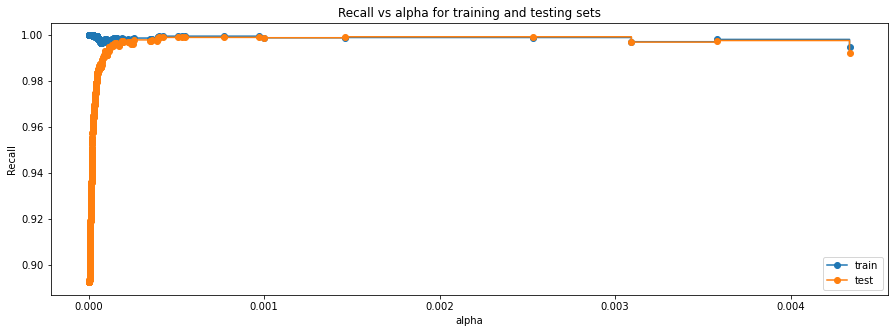

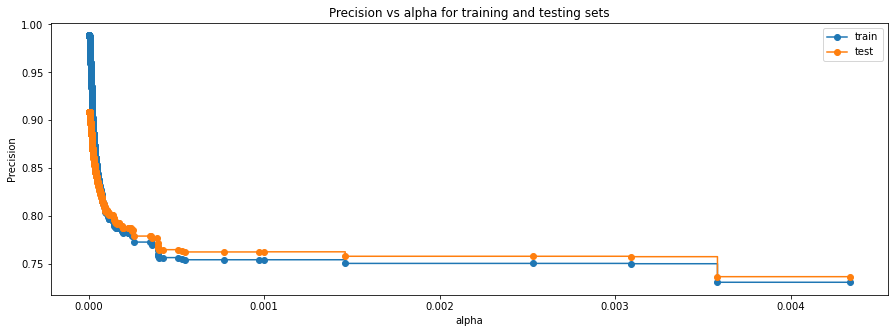

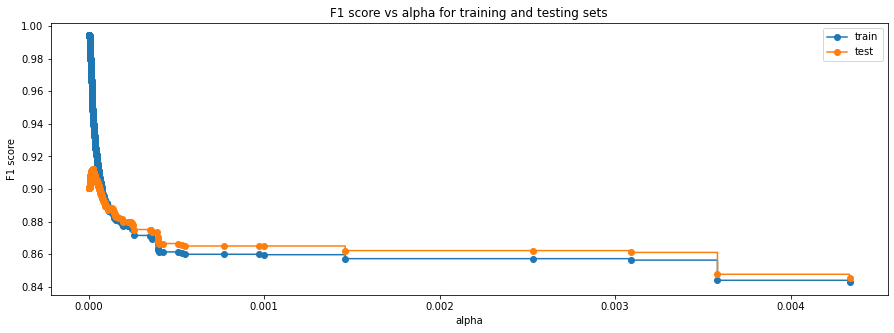

<IPython.core.display.Javascript object>

In [139]:
# Plotting recall vs alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# PLotting precision vs alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Plotting f1score vs alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1score_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1score_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

#### Creating model with 0.0015 ccp_alpha

In [140]:
best_model = DecisionTreeClassifier(
    ccp_alpha=0.0015, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0015, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

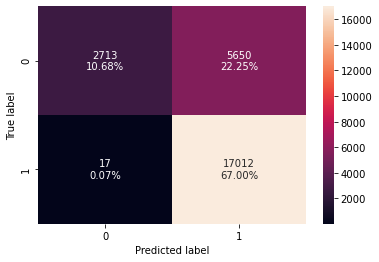

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [142]:
decision_tree_postpruned_perf_train_recall = get_recall_score(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train_precision = get_precision_score(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train_f1score = get_f1_score(best_model, X_train, y_train)


print("Recall Score:", decision_tree_postpruned_perf_train_recall)
print("Precision Score:", decision_tree_postpruned_perf_train_precision)
print("F1 Score:", decision_tree_postpruned_perf_train_f1score)

Recall Score: 0.9990017029772741
Precision Score: 0.7506839643456006
F1 Score: 0.8572220402610163


<IPython.core.display.Javascript object>

#### Checking performance on the test set

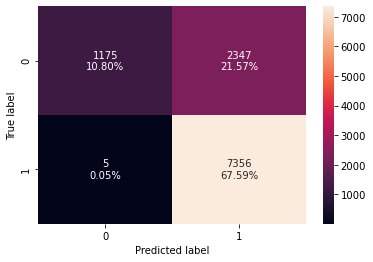

<IPython.core.display.Javascript object>

In [143]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [144]:
decision_tree_postpruned_perf_test_recall = get_recall_score(best_model, X_test, y_test)
decision_tree_postpruned_perf_test_precision = get_precision_score(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test_f1score = get_f1_score(best_model, X_test, y_test)

print("Recall Score:", decision_tree_postpruned_perf_test_recall)
print("Precision Score:", decision_tree_postpruned_perf_test_precision)
print("F1 Score:", decision_tree_postpruned_perf_test_f1score)

Recall Score: 0.9993207444640674
Precision Score: 0.7581160465835308
F1 Score: 0.8621659634317862


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

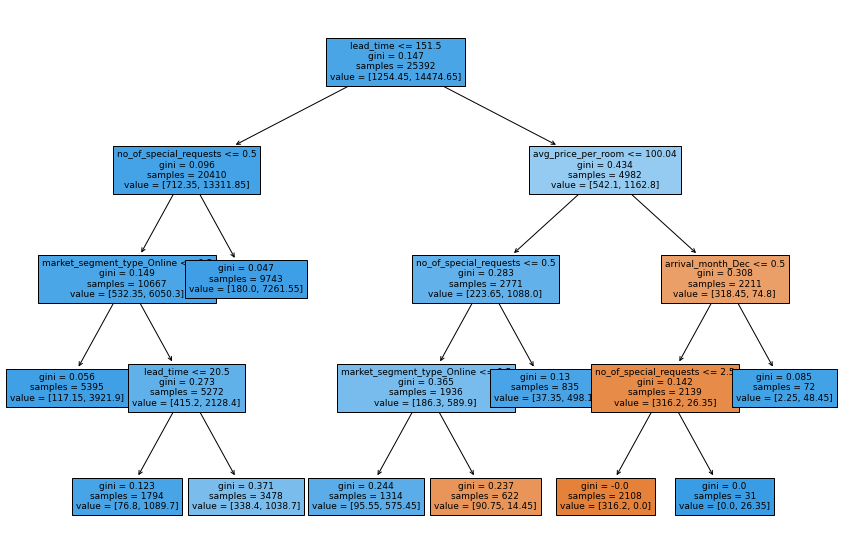

<IPython.core.display.Javascript object>

In [145]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [146]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [117.15, 3921.90] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- weights: [76.80, 1089.70] class: 1
|   |   |   |--- lead_time >  20.50
|   |   |   |   |--- weights: [338.40, 1038.70] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [180.00, 7261.55] class: 1
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- market_segment_type_Online <= 0.50
|   |   |   |   |--- weights: [95.55, 575.45] class: 1
|   |   |   |--- market_segment_type_Online >  0.50
|   |   |   |   |--- weights: [90.75, 14.45] class: 0
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [37.35, 498.10] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month_Dec <= 0.50
|   |   |   |--- no_

<IPython.core.display.Javascript object>

In [147]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.317039
avg_price_per_room                    0.304005
market_segment_type_Online            0.185134
no_of_special_requests                0.109982
arrival_month_Dec                     0.083840
const                                 0.000000
arrival_month_Jun                     0.000000
arrival_month_Aug                     0.000000
arrival_month_Feb                     0.000000
arrival_month_Jan                     0.000000
arrival_month_Jul                     0.000000
arrival_month_May                     0.000000
arrival_month_Mar                     0.000000
market_segment_type_Corporate         0.000000
arrival_month_Nov                     0.000000
arrival_month_Oct                     0.000000
arrival_month_Sep                     0.000000
arrival_year_2018                     0.000000
required_car_parking_space_1          0.000000
market_segment_type_Offline           0.000000
room_type_res

<IPython.core.display.Javascript object>

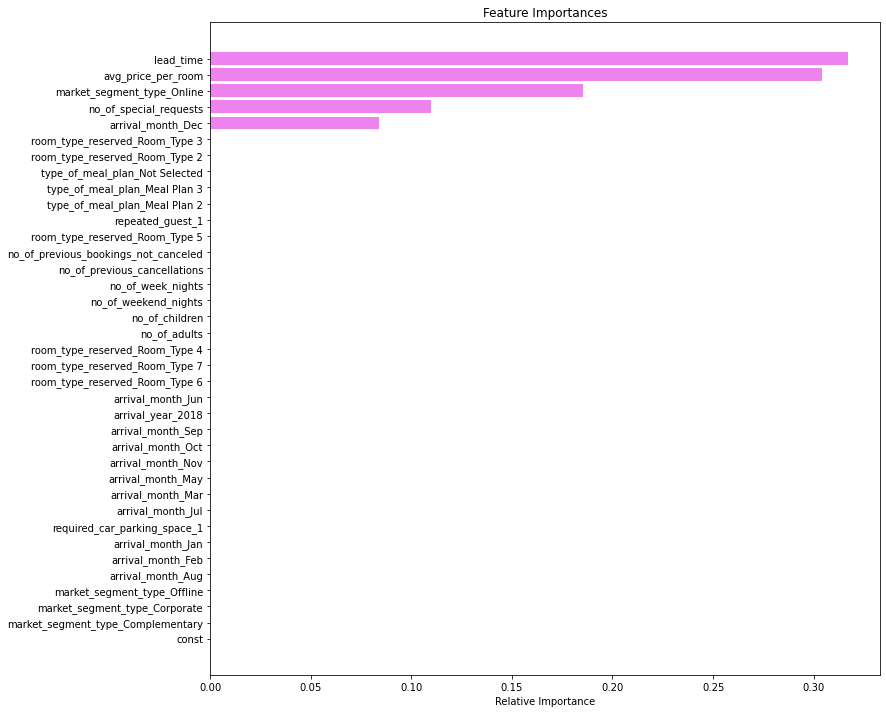

<IPython.core.display.Javascript object>

In [148]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* lead_time, avg_price_per_room and market_segment_type_Online are the top three important features to predict customer sessions contributing to Revenue.

### Comparing all the decision tree models

In [149]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    {
        "Recall on training set": [
            decision_tree_perf_train_recall,
            decision_tree_tune_perf_train_recall,
            decision_tree_postpruned_perf_train_recall,
        ],
        "Precision on training set": [
            decision_tree_perf_train_precision,
            decision_tree_tune_perf_train_precision,
            decision_tree_postpruned_perf_train_precision,
        ],
        "F1 score on training set": [
            decision_tree_perf_train_f1score,
            decision_tree_tune_perf_train_f1score,
            decision_tree_postpruned_perf_train_f1score,
        ],
    }
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set  Precision on training set  F1 score on training set
0                0.999941                   0.988563                  0.994220
1                0.999648                   0.752198                  0.858447
2                0.999002                   0.750684                  0.857222

<IPython.core.display.Javascript object>

In [150]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    {
        "Recall on testing set": [
            decision_tree_perf_test_recall,
            decision_tree_tune_perf_test_recall,
            decision_tree_postpruned_perf_test_recall,
        ],
        "Precision on testing set": [
            decision_tree_perf_test_precision,
            decision_tree_tune_perf_test_precision,
            decision_tree_postpruned_perf_test_precision,
        ],
        "F1 score on testing set": [
            decision_tree_perf_test_f1score,
            decision_tree_tune_perf_test_f1score,
            decision_tree_postpruned_perf_test_f1score,
        ],
    }
)

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Recall on testing set  Precision on testing set  F1 score on testing set
0               0.892542                  0.908337                 0.900370
1               0.999457                  0.758923                 0.862738
2               0.999321                  0.758116                 0.862166

<IPython.core.display.Javascript object>

The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions: Decision Tree

* We built a model with 0.86 F1 score to predict if a guest is going to cancel the booking or not.
* lead_time, avg_price_per_room, market_segment_type_Online, no_of_special_requests and arrival_month_Dec are the most important variables in the model to predict the guest who is going to cancel the booking.

## Model Performance Comparison and Conclusions

In [151]:
print("Decision Tree Performance:\n", models_test_comp_df)
print("=" * 100)
print("Logistic Regression Performance:\n", models_test_comp_df_log)

Decision Tree Performance:
    Recall on testing set  Precision on testing set  F1 score on testing set
0               0.892542                  0.908337                 0.900370
1               0.999457                  0.758923                 0.862738
2               0.999321                  0.758116                 0.862166
Logistic Regression Performance:
            Logistic Regression sklearn  Logistic Regression-0.76 Threshold  \
Accuracy                      0.807957                            0.794909   
Recall                        0.886564                            0.809808   
Precision                     0.838710                            0.877521   
F1                            0.861973                            0.842306   

           Logistic Regression-0.58 Threshold  
Accuracy                             0.804374  
Recall                               0.844450  
Precision                            0.863333  
F1                                   0.853788  


<IPython.core.display.Javascript object>

### Conclusions:

* From the decision tree and logistic regression models built, the pre-pruned and the post-pruned decision tree models and Logistic regression model with sklearn will be able to predict whether a guest will cancel the booking or not with an F1 score of 0.86.

* All the logistic regression models have given a generalized performance on the training and test set.
* Coefficient of no_of_special_requests, few types of room_type, market segment type of Corporate and Offline, few arrival months, required_car_parking_space_1 and repeated_guest_1 in logistic regression model are positive and increase in these will lead to increase in chances of a guest not cancelling the booking of hotel.
* Coefficient of no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, avg_price_per_room, few types of meal plan and few months of arrival in logistic regression model are negative and increase in these will lead to decrease in chances of a guest not cancelling the booking of hotel.

* The pre-pruned and the post-pruned decision tree models have reduced overfitting and the model is giving a generalized performance.
* lead_time, avg_price_per_room, market_segment_type_Online, no_of_special_requests and arrival_month_Dec are the most important variables in the model to predict the guest who is going to cancel the booking.

## Actionable Insights and Recommendations

* There are more number of bookings and cancellations during the month of October, September and August. Having some special offers and some restrictions on cancellations during these months can help to reduce the cancellation of bookings.
* The percentage of cancellation by repeated guests is very less, but the number of repeated guests are less. Offering free loyalty programs, being a member can guarantee better room placement, free nights or helpful amenities.
* Complementary and Corporate segments have more returning guests whereas Online and Offline segments have very less returning guests. More publicity of special rates or points for returning guests in the Online and Offline segments may help here.
* There are more cancellations when the lead time is more. The lead time for bookings from September to December is more when compared to other months. The INN Hotels can add some restrictions on the dates within which the cancellation can be made so that there is enough time to resell the room.
* Online segment has the maximum cancellation rate, followed by Offline and Aviation segments. Applying some restrictions and some cancellation charges may help to reduce the number of cancellations. 
* The average price per room for canceled bookings are more in Offline, Online and Corporate segments. Some kind of price match guarantee can help here.
* The rate of cancellation is less when the guests require car parking space. Having a car parking space for the guests will be helpful.
* Bookings with more lead time and more average price per room has higher chances of getting cancelled.
* When there are 1 or more special requests, the cancellation of bookings is less. 
* Booking with more lead time and with special requests have lesser chances of getting cancelled.
* 76.7% of guests choose Meal Plan 1.
* 77.5% of the guests choose Room_Type 1.  

===============================================================================================================================